# WeRateDogs Project
## Udacity Data Wrangling Course
### Justin Brown (jb669n@att.com)

## Gather

In [8]:
import requests
import os
import zipfile
import pandas as pd
import numpy as np
import tweepy
import json
from IPython.display import display
import matplotlib.pyplot as plt
from pprint import pprint
from inspect import getmembers
import platform
import datetime

In [9]:
#### If you want Tweepy to load tweets from Twitter, set this variable to True.
#### If you already have the tweets and want to load them from the local file, set this variable to False.

get_tweets = False

### Open Twitter Archive File

Provided filename "twitter_archive_enhanced.csv" stored in folder "source_files".

CORRECTION: Filename given in course is as stated above.  However, after saving the file and attempting to open it using the commented line in the next cell, I received an error that the file did not exist.  Upon inspection, it was discovered that the file is actually named "twitter-archive-enhanced.csv".  This has been corrected below.

In [10]:
#twitter_archive_filename = "twitter_archive_enhanced.csv"
twitter_archive_filename = "twitter-archive-enhanced.csv"

twit_df = pd.read_csv(twitter_archive_filename)
display(twit_df.head(5))
display(twit_df.info())
len(twit_df)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None

2356

### Download Image Predictions File

Save to folder named "source_files"

In [11]:
# Store the URL of the source file.

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [12]:
# Download file from:
#     https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

response = requests.get(url)

# Write file to local CSV and read it back into a dataframe.

if str(response) == "<Response [200]>":
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)    
    
    img_df = pd.read_csv(url.split('/')[-1], sep = "\t")
    display(img_df.head())

else:
    # If the URL returns a bad response, display this message.
    
    print("The URL \"" + url.split('/')[-1] + "\" failed.")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Gather information from Tweepy

In [13]:
# Read tokens from local environment variables to avoid exposing in code.

# NOTE: To execute the next cell, you will need to replace the app and tokens with your own api authentication values.
#       If you choose to place your values into the environment variables using same variable names mentioned below,
#       you can execute this cell to load those values.  Otherwise, you will need to care for ensuring that the app,
#       token and key variables with the names used below contain your authentication values prior to executing the
#       next cell.

twitter_app = os.environ['TWITTER_APP_WERATEDOGS']
twitter_access_token = os.environ['TWITTER_ACCESS_TOKEN']
twitter_access_token_secret = os.environ['TWITTER_ACCESS_TOKEN_SECRET']
twitter_api_key = os.environ['TWITTER_API_KEY']
twitter_api_secret_key = os.environ['TWITTER_API_SECRET_KEY']

In [14]:
# Retrieve tweets from Twitter via Tweepy and store the results into a json file.
# Print success or error message for each tweet processed.

# NOTE: This cell should only be executed if there is a need to refresh the tweet information.  Execution of this
#       cell takes considerable time.

if get_tweets:
    auth = tweepy.OAuthHandler(twitter_api_key, twitter_api_secret_key)
    auth.set_access_token(twitter_access_token, twitter_access_token_secret)

    api = tweepy.API(auth)

    tweet_json = {}

    for tweet_id in twit_df.tweet_id:
        try:
            tweet_json[str(tweet_id)] = api.get_status(id = tweet_id, tweet_mode = 'extended', 
                                                       wait_on_rate_limit = True, wait_on_rate_limit_notify = True
                                                      )._json
        except:
            print("  error - not available: " + str(tweet_id))

    # If the file tweet_json.txt already exists, remove it before writing to reset the "created on" date for future use.
    try:
        os.remove("tweet_json.txt")
    except:
        pass

    with open("tweet_json.txt", mode='w', encoding= "utf-8") as file:
        json.dump(tweet_json, file)

In [15]:
# Read in json file and save columns of interest into a dataframe.

with open("tweet_json.txt", mode="r", encoding= "utf-8") as file:
    tweet_json = json.load(file)

tweet_dict = []

for tweet in tweet_json.keys():
    tweet_dict.append(
    {
        'tweet_id' : tweet_json[tweet]['id_str'],
        'favorite_count' : tweet_json[tweet]['favorite_count'], 
        'retweet_count' : tweet_json[tweet]['retweet_count'], 
        'coordinates' : tweet_json[tweet]['coordinates']
     })
    
tweet_df = pd.DataFrame(tweet_dict)
tweet_df = tweet_df.set_index('tweet_id')

In [16]:
display(tweet_df.head())

,coordinates,favorite_count,retweet_count
tweet_id,,,
892420643555336193,None,36813,7847
892177421306343426,None,31698,5812
891815181378084864,None,23877,3847
891689557279858688,None,40140,8014
891327558926688256,None,38339,8659


## Assess

### Visual Assessment

In [17]:
twit_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
tweet_df

,coordinates,favorite_count,retweet_count
tweet_id,,,
892420643555336193,None,36813,7847
892177421306343426,None,31698,5812
891815181378084864,None,23877,3847
891689557279858688,None,40140,8014
891327558926688256,None,38339,8659
891087950875897856,None,19283,2888
890971913173991426,None,11243,1901
890729181411237888,None,62079,17520
890609185150312448,None,26532,3979


In [19]:
img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Programmatic Assessment

### twit_df Table

In [20]:
twit_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
twit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
twit_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1898,674690135443775488,NaN,NaN,2015-12-09 20:40:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Patrick. He's an exotic pup. Jumps great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674690135...,3,10,Patrick,None,None,None,None
1400,699446877801091073,NaN,NaN,2016-02-16 04:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's undercover in all these p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699446877...,12,10,Archie,None,None,None,None
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446...,9,10,None,None,None,None,None
1391,700143752053182464,NaN,NaN,2016-02-18 02:24:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When it's Janet from accounting's birthday but...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None


In [23]:
twit_df.describe(include = "all")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-01-09 00:53:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a heavily opinionated dog. Loves walls...,NaN,NaN,2015-11-28 03:31:48 +0000,https://twitter.com/dog_rates/status/820749716...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [24]:
twit_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
twit_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
# Validating that items appearing with a retweeted_status_id acutally appear as retweets (i.e. contain RT)
twit_df[twit_df['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [27]:
twit_df[twit_df['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [28]:
pd.set_option('display.max_colwidth', 0)
             
print(twit_df.loc[twit_df['tweet_id'] == 890729181411237888, 'expanded_urls'])


7    https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1
Name: expanded_urls, dtype: object


In [29]:
twit_df[['in_reply_to_status_id','retweeted_status_id','expanded_urls','rating_numerator','rating_denominator']].loc[twit_df['expanded_urls'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 30 to 2298
Data columns (total 5 columns):
in_reply_to_status_id    55 non-null float64
retweeted_status_id      1 non-null float64
expanded_urls            0 non-null object
rating_numerator         59 non-null int64
rating_denominator       59 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.8+ KB


In [30]:
twit_df[['in_reply_to_status_id','retweeted_status_id','expanded_urls','rating_numerator','rating_denominator']].loc[twit_df['expanded_urls'].isnull()]

,in_reply_to_status_id,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator
30,8.862664e+17,NaN,NaN,12,10
55,8.816070e+17,NaN,NaN,17,10
64,8.795538e+17,NaN,NaN,14,10
113,8.707262e+17,NaN,NaN,10,10
148,8.634256e+17,NaN,NaN,12,10
179,8.571567e+17,NaN,NaN,12,10
185,NaN,8.563302e+17,NaN,14,10
186,8.562860e+17,NaN,NaN,14,10
188,8.558616e+17,NaN,NaN,420,10
189,8.558585e+17,NaN,NaN,666,10


In [31]:
twit_df['expanded_urls'][30]

nan

In [32]:
twit_df['expanded_urls'].sample(30)

158     https://twitter.com/dog_rates/status/861005113778896900/photo/1                                                                                                                                                                                                                     
71      https://twitter.com/dog_rates/status/878776093423087618/photo/1,https://twitter.com/dog_rates/status/878776093423087618/photo/1                                                                                                                                                     
2234    https://twitter.com/dog_rates/status/668190681446379520/photo/1                                                                                                                                                                                                                     
2055    https://twitter.com/dog_rates/status/671362598324076544/photo/1                                                                          

In [33]:
na_mask = twit_df['expanded_urls'].notnull()
lengths = []
for item in twit_df.loc[na_mask, 'expanded_urls']:
    split_str = item.split(',')
    valid = 0
    check_str = []
    
    for x in range(len(split_str)):
        if pd.Series(split_str[x]).str.match(pat = '(https://twitter.com/).*(/status/)(\d{18})($|/(photo|video)($|/\d))|(https://vine.co/v/)(.{11})')[0]:
            if split_str[x] in check_str:
                continue
            else:
                check_str.append(split_str[x])
                valid += 1
        else:
            print(split_str[x])
    
    lengths.append(valid)

print("max valid URLs in expanded_urls = " + str(max(lengths)))
            

https://gofundme.com/ydvmve-surgery-for-jax
https://www.gofundme.com/mingusneedsus
https://www.gofundme.com/3yd6y1c
https://www.gofundme.com/3yd6y1c
https://www.gofundme.com/help-my-baby-sierra-get-better
https://www.gofundme.com/help-my-baby-sierra-get-better
https://www.gofundme.com/help-fix-codys-torn-acl
https://www.gofundme.com/3ti3nps
https://www.gofundme.com/3ti3nps
https://www.gofundme.com/helpquinny
https://www.gofundme.com/helpquinny
https://www.gofundme.com/help-lorenzo-beat-cancer
https://www.gofundme.com/help-lorenzo-beat-cancer
https://www.gofundme.com/meeko-needs-heart-surgery
http://www.gofundme.com/bluethewhitehusky
https://www.gofundme.com/bennys-medical-bills
https://www.gofundme.com/help-save-rontu
https://www.petfinder.com/petdetail/37334596
https://www.gofundme.com/help-save-a-pup
https://www.gofundme.com/get-indie-home/
https://www.gofundme.com/3hgsuu0
https://www.gofundme.com/3hgsuu0
https://www.gofundme.com/lolas-life-saving-surgery-funds
https://www.gofundme.c

In [34]:
twit_df['source'].sample(10)

1856    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1671    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2234    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1141    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1931    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2018    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2176    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1449    <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                   
1279    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2173    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [35]:
twit_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [36]:
for item in twit_df['source']:
    src = pd.Series(item).str.extract('(.*>)(.*)(<.*)')[1][0]
    if src != "Twitter for iPhone":
        print(src)

Twitter Web Client
Twitter Web Client
Twitter Web Client
Twitter Web Client
Twitter Web Client
Twitter Web Client
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Twitter Web Client
Twitter Web Client
Vine - Make a Scene
Twitter Web Client
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
TweetDeck
TweetDeck
TweetDeck
TweetDeck
TweetDeck
TweetDeck
TweetDeck
Vine - Make a Scene
Twitter Web Client
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Twitter Web Client
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
Vine - Make a Scene
V

In [37]:
display(twit_df['tweet_id'].loc[twit_df.rating_denominator == 0])

display(twit_df['rating_numerator'].loc[twit_df.tweet_id == 835246439529840640])
display(twit_df['rating_denominator'].loc[twit_df.tweet_id == 835246439529840640])

313    835246439529840640
Name: tweet_id, dtype: int64

313    960
Name: rating_numerator, dtype: int64

313    0
Name: rating_denominator, dtype: int64

#### tweet_df Table

In [38]:
tweet_df.head()

,coordinates,favorite_count,retweet_count
tweet_id,,,
892420643555336193,None,36813,7847
892177421306343426,None,31698,5812
891815181378084864,None,23877,3847
891689557279858688,None,40140,8014
891327558926688256,None,38339,8659


In [39]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
coordinates       0 non-null object
favorite_count    2236 non-null int64
retweet_count     2236 non-null int64
dtypes: int64(2), object(1)
memory usage: 69.9+ KB


In [40]:
tweet_df.describe()

,favorite_count,retweet_count
count,2236.000000,2236.000000
mean,7700.964669,2763.822451
std,11681.749842,4470.250878
min,0.000000,1.000000
25%,1283.500000,543.000000
50%,3267.500000,1285.500000
75%,9657.500000,3253.000000
max,135632.000000,58824.000000


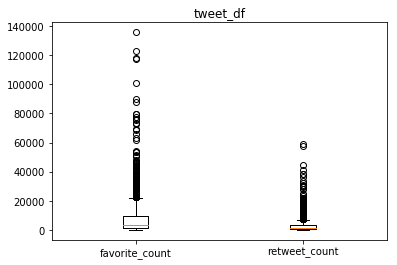

In [41]:
fig1, ax1 = plt.subplots()
_ = ax1.set_title('tweet_df')
_ = ax1.boxplot([tweet_df.favorite_count, tweet_df.retweet_count])
_ = ax1.set_xticklabels(['favorite_count', 'retweet_count'])
plt.show()

#### img_df Table

In [42]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [43]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
img_df.describe(include = 'all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [45]:
img_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
German_shepherd              20 
Staffordshire_bullterrier    20 
Siberian_husky               20 
Cardigan                     19 
web_site                     19 
beagle                       18 
Eskimo_dog                   18 
teddy                        18 
Shetland_sheepdog            18 
Maltese_dog                  18 
Lakeland_terrier             17 
Shih-Tzu                     17 
Rottweiler                   17 
Italian_greyhound            16 
kuvasz                       16 
          

In [46]:
img_df.loc[img_df['img_num'] == 2]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
410,673887867907739649,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
478,675334060156301312,https://pbs.twimg.com/media/CV9EvZNUwAAgLCK.jpg,2,Pembroke,0.773135,True,Cardigan,0.116810,True,chow,0.039036,True


### Summary of Assessment

#### twit_df Table
#### <u>Quality</u>

- ##### <font color="#ff0000">***DONE***</font>  Completeness
 - <font color="#ff0000">***DONE***</font>  in_reply_to_status_id" & "in_reply_to_user_id" appear to be primarily NaN.
 - <font color="#ff0000">***DONE***</font>  Replies appear to be validating or re-rating a submision, so from a total ratings perspective, they could be valid.  Should include a boolean for is_reply so analyst can choose whether to include or exclude
 - <font color="#ff0000">***DONE***</font>  "expanded_urls" contains NaN values.
 - <font color="#ff0000">***DONE***</font>  "doggo", "flufer", "puppo", "pupper" contain "None" in over 2000 records each and should be eliminated from the final dataset.


- ##### <font color="#ff0000">***DONE***</font>  Validity
 - <font color="#ff0000">***DONE***</font>  "retweeted" fields appear to be primarily NaN.  - Remove non-NaN records from dataset (retweets) in order to avoid duplication of the tweet in the datase.
 - <font color="#ff0000">***DONE***</font>  "tweet_id" is integer, should be string.
 - <font color="#ff0000">***DONE***</font>  "timestamp" is object, should be date_time.
 - <font color="#ff0000">***DONE***</font>  "source" is object, should be string.
 - <font color="#ff0000">***DONE***</font>  "text" is object, should be string.
 - <font color="#ff0000">***DONE***</font>  "expanded_urls" is object, should be string.
 - <font color="#ff0000">***DONE***</font>  "name" is object, should be string.
 
 - ***NOTE: Determined that "Object" is the proper data type for strings.***


- ##### <font color="#ff0000">***DONE***</font>  Accuracy
 - <font color="#ff0000">***DONE***</font>  Records should have 10 as the "rating_denominator".  Some do not.
   - Observation: As the rating system is not scientific, open text based and enjoyed by all as unstructured, I am choosing not to clean this field.  Any analysis using the "rating_numerator" and "rating_denominator" will be normalized by calculating the ratio.
    - NOTE: It was decided during cleaning that this normalization atually made sense.  The denominator was cleaned.
 - <font color="#ff0000">***DONE***</font>  "name" field contains non-name values such as None, a, an, the, etc.
 - <font color="#ff0000">***DONE***</font>  "expanded_urls" contains up to 8 different URLs violating the tidiness rule. Should be split into separate url fields.

- ##### <font color="#ff0000">***DONE***</font> Consistency
 - Remove http tags from "source" and store just the text displaying the source.


#### <font color="#ff0000">***DONE***</font>  <u>Tidiness</u>
- <font color="#ff0000">***DONE***</font>  In hindsight, table name is not descriptive and can easily be confused with tweet_df
- <font color="#ff0000">***DONE***</font>  "expanded_urls" contains up to 8 different URLs violating the tidiness rule.  Should be split into url1, url2 and url3 with NaN in values in url2 and url3 if they do not exist.


#### tweet_df Table
#### <font color="#ff0000">***DONE***</font>   <u>Quality</u>

- ##### <font color="#ff0000">***DONE***</font>  Completeness
 - <font color="#ff0000">***DONE***</font>  Coordinates appear to be mostly "None"
 - <font color="#ff0000">***DONE***</font>  Only 1027 rows.  Others were not returned by the Twitter API.  For analysis using Favorite and Retweet data, only these tweet_ids can be used.
   - <s>Remove rows from twit_df where there is no match in tweet_df?</s>
   - <font color="#ff0000">***DONE***</font>  Add data on matching rows and leave NaN so analysis that does not depend on Favorite and Retweet can benefit from larger dataset
 - <font color="#ff0000">***DONE***</font>  Some data in tweet_df Table may not contain a match in the main twit_df table.  Probably should ID and discard from final dataset as the primary analysis will likely center around the data contained there.
   - Correction: Since the tweet_ids in twit_df were actually used to obtain the results in this table, this should not be the case.
     
- ##### <font color="#ff0000">***DONE***</font>   Validity
 - None Observed

- ##### <font color="#ff0000">***DONE***</font>   Accuracy
 - None Observed

- ##### <font color="#ff0000">***DONE***</font> Consistency
 - Should probably add a timestamp (or at least a date) on which the favorite and retweet data was collected to show it relative to the date of the original tweet and for use in future analysis.


- #### <font color="#ff0000">***DONE***</font>   <u>Tidiness</u>
 - <font color="#ff0000">***DONE***</font>   tweet_id stored as index (other tables store it as a column)
 - <font color="#ff0000">***DONE***</font>   In hindsight, table name is not descriptive and can easily be confused with twit_df

#### img_df Table
#### <font color="#ff0000">***DONE***</font>   <u>Quality</u>

- ##### <font color="#ff0000">***DONE***</font>   Completeness
 - <font color="#ff0000">***DONE***</font>   2075 rows (vs 1027 tweet_df and 2356 in twit_df)
   - <font color="#ff0000">***DONE***</font>   Merge rows with matching tweet_id
- <font color="#ff0000">***DONE***</font>   Some data in img_df Table may not contain a match in the main twid_df table.  Probably should report on and discard from final dataset as the primary analysis will likely center around the data contained there.
 - Observation - If the tweet_ids in twit_df were actually used to obtain the results in this table, this should not be the case.  However, since I did not acquire this data, should look for cases where there is a tweet_id in img_df and not in twit_df and report/discard.
 - Further Observation - From the Project Motivation: "I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*."  Based on this, I feel confident that this scenario will not exist even though I did not procure the img_df dataset.

- ##### <font color="#ff0000">***DONE***</font>   Validity
 - <font color="#ff0000">***DONE***</font>   Some breed names are not dogs.
   - What do we do with these records?
   - May be an accuracy issue
   - NOTE: Determined that this is an artifact of the image recognition program.  While, in the few samples I observed, there was a dog in the photo, the determination of the image recognition is understandable. (i.e. One is labeled as a bagel. On viewing the image, the photographer took a picture of their dog through the hole in a doughnut which was the most dominant artifact in the photo.  Manual scrubbing is not realistic, so full conclusive results from analysis would not be possible. However, there could be some humorous analysis possible which would fit into the light-hearted nature of the Dog Rating site.  Data will be retained as is.
 - <font color="#ff0000">***DONE***</font>   "tweet_id" is integer, should be string.
 - <font color="#ff0000">***DONE***</font>   "jpg_url" is object, should be string.
 - <font color="#ff0000">***DONE***</font>   "p1" is object, should be string.
 - <font color="#ff0000">***DONE***</font>   "p2" is object, should be string.
 - <font color="#ff0000">***DONE***</font>   "p3" is object, should be string.
 
 

- ##### <font color="#ff0000">***DONE***</font>    Accuracy
 - <font color="#ff0000">***DONE***</font>   Some breed names are not dogs.
   - What do we do with these records?
   - May be a validity issue
   - See note above under Quality/Validity.

- ##### <font color="#ff0000">***DONE***</font>    Consistency
 - None Observed


#### <font color="#ff0000">***DONE***</font>   <u>Tidiness</u>
- <font color="#ff0000">***DONE***</font>   Create a table with all breed names and whether they are or are not dogs.  Reference this information in the master table using the index of the breed name in the breed table to avoid unnecessary replication of data within the dataset.
 - After programmagic assessment, there are too many unique values which would cause this recommendationg to create more work than it is worth.  The additional effort to lookup the value in another table does not seem to offset the savings in data repetition.


#### <font color="#ff0000">***DONE***</font>   <u>Overall Tidiness</u>

- <font color="#ff0000">***DONE***</font>   Using tweet_id as the primary key, create two tables:
 - <font color="#ff0000">***DONE***</font>   Table 1 - All information about the tweet
   - tweet_id
   - timestamp
   - source
   - text
   - retweet_count
   - favorite_count
   
 - <font color="#ff0000">***DONE***</font>   Table 2 - All information about the dog
   - tweet_id
   - name
   - doggo
   - floofer
   - pupper
   - puppo        
   - jpg_url
   - img_num
   - p1
   - p1_conf
   - p1_dog
   - p2
   - p2_conf
   - p2_dog
   - p3
   - p3_conf


# <font color='ff0000'>* * * * * * * * * * * * * * * * * FIRST CLEAN COPY * * * * * * * * * * * * * * * * *</f>

## Clean

Copy data to new DataFrames to preserve the original data.

In [47]:
twit_clean = twit_df.copy()
tweet_clean = tweet_df.copy()
img_clean = img_df.copy()

### twit_clean - Quality - Completeness

#### <font color="#FF0000#"> ***DONE*** </font>  "in_reply_to_status_id" & "in_reply_to_user_id" appear to be primarily NaN.

#### Define

These columns are related to tweets that are replies.  Since most of the tweets are original tweets, and replies can contain ratings as well, it is appropriate that most are NaN.  These columns will likely not be useful in the analysis (both because of their relevancy and their completeness) and will be removed in the tidiness step creating the final table structure.

####  <font color="#FF0000#"> ***DONE*** </font>  Replies appear to be validating or re-rating a submision, so from a total ratings perspective, they could be valid. Should include a boolean for is_reply so analyst can choose whether to include or exclude

#### Define
While the content of the reply fields are not relevant, the fact that the tweet is or is not a reply may be.  Create a field that is True if the "in_reply_to_status_id" field is not NaN, and False if it is NaN.

#### Code

In [48]:
false_mask = twit_clean.in_reply_to_status_id.isnull()
true_mask = twit_clean.in_reply_to_status_id.notnull()

column_name = 'is_reply'

twit_clean.loc[false_mask, column_name] = False
twit_clean.loc[true_mask, column_name] = True

#### Test

In [49]:
twit_clean['is_reply'].value_counts()

False    2278
True     78  
Name: is_reply, dtype: int64

In [50]:
twit_clean['is_reply'].loc[twit_clean.in_reply_to_status_id.notnull()].value_counts()

True    78
Name: is_reply, dtype: int64

In [51]:
twit_clean['is_reply'].loc[twit_clean.in_reply_to_status_id.isnull()].value_counts()

False    2278
Name: is_reply, dtype: int64

In [52]:
twit_clean['tweet_id'][0]

892420643555336193

#### <font color="#FF0000#"> ***DONE*** </font>   "expanded_urls" contains NaN values.

#### Define
If expanded_urls is NaN, this should mean that there was no image to rate. Reassess after table merge to look for patterns.

####  <font color="#FF0000#"> ***DONE*** </font>  "doggo", "flufer", "puppo", "pupper" contain "None" in over 2000 records each and should be eliminated from the final dataset.

#### Define
Address in Tidiness by eliminating from the table merge.

### tweet_clean - Quality - Completeness

####  <font color="#FF0000#"> ***DONE*** </font>  Coordinates appear to be mostly "None"
#### Define
As this will not be useable in analysis, eliminate it from the table merge.

####  <font color="#FF0000#"> ***DONE*** </font>  Only 1027 rows. Others were not returned by the Twitter API. For analysis using Favorite and Retweet data, only these tweet_ids can be used.
- ##### Add data on matching rows and leave NaN so analysis that does not depend on Favorite and Retweet can benefit from larger dataset

#### Define
Address in tidiness.  Where a row exists in tweet_clean with a matching tweet_id in twit_clean, add the Favorite and Retweet Data to the final table.

### img_clean - Quality - Completeness

####  <font color="#FF0000#"> ***DONE*** </font>  2075 rows (vs 1027 tweet_df and 2356 in twit_df)
- ##### Merge rows with matching tweet_id

#### Define
Address in tidiness.  Where a row exists in img_clean with a matching tweet_id in twit_clean, merge data in the final table.

### twit_clean - Tidiness

####  <font color="#FF0000#"> ***DONE*** </font>  "expanded_urls" contains up to 8 different URLs violating the tidiness rule. Should be split into separate url fields.

#### Define
Assessment showed that the URL field contained bad and duplicate data, and the maximum number of valid and unique URLs in the field was 1.  Therefore, cleaning this field and renaming the URL is all that is needed.

#### Code

In [53]:
na_mask = twit_clean['expanded_urls'].notnull()

twit_clean['url'] = np.nan

lengths = []

url_columns = ['tweet_id','expanded_url','url']
item = []

for index, row in twit_clean.loc[na_mask].iterrows(): 
   
    valid_url = np.nan
    
    split_str = row['expanded_urls'].split(',')
    
    valid = 0
    check_str = []
    
    for x in range(len(split_str)):
        if pd.Series(split_str[x]).str.match(pat = '(https://twitter.com/).*(/status/)(\d{18})($|/(photo|video)($|/\d))|(https://vine.co/v/)(.{11})')[0]:
            if split_str[x] in check_str:
                _
            else:
                valid_url = split_str[x]
                check_str.append(split_str[x])
                valid += 1
        else:
            print("Not a match: " + split_str[x])
        
        twit_clean.loc[twit_clean['tweet_id'] == row['tweet_id'], 'url'] = valid_url
        
    lengths.append(valid)

print("max valid URLs in expanded_urls = " + str(max(lengths)))

Not a match: https://gofundme.com/ydvmve-surgery-for-jax
Not a match: https://www.gofundme.com/mingusneedsus
Not a match: https://www.gofundme.com/3yd6y1c
Not a match: https://www.gofundme.com/3yd6y1c
Not a match: https://www.gofundme.com/help-my-baby-sierra-get-better
Not a match: https://www.gofundme.com/help-my-baby-sierra-get-better
Not a match: https://www.gofundme.com/help-fix-codys-torn-acl
Not a match: https://www.gofundme.com/3ti3nps
Not a match: https://www.gofundme.com/3ti3nps
Not a match: https://www.gofundme.com/helpquinny
Not a match: https://www.gofundme.com/helpquinny
Not a match: https://www.gofundme.com/help-lorenzo-beat-cancer
Not a match: https://www.gofundme.com/help-lorenzo-beat-cancer
Not a match: https://www.gofundme.com/meeko-needs-heart-surgery
Not a match: http://www.gofundme.com/bluethewhitehusky
Not a match: https://www.gofundme.com/bennys-medical-bills
Not a match: https://www.gofundme.com/help-save-rontu
Not a match: https://www.petfinder.com/petdetail/37

In [54]:
twit_clean['url']

0       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1
4       https://twitter.com/dog_rates/status/891327558926688256/photo/1
5       https://twitter.com/dog_rates/status/891087950875897856/photo/1
6       https://twitter.com/dog_rates/status/890971913173991426/photo/1
7       https://twitter.com/dog_rates/status/890729181411237888/photo/1
8       https://twitter.com/dog_rates/status/890609185150312448/photo/1
9       https://twitter.com/dog_rates/status/890240255349198849/photo/1
10      https://twitter.com/dog_rates/status/890006608113172480/photo/1
11      https://twitter.com/dog_rates/status/889880896479866881/photo/1
12      https://twitter.com/dog_rates/status/889665388333682689/photo/1
13      https://twitter.com/dog_rates/status/889638837579907072/

In [55]:
twit_clean['url'].describe()

count     2293                                                           
unique    2136                                                           
top       https://twitter.com/dog_rates/status/700747788515020802/photo/1
freq      2                                                              
Name: url, dtype: object

In [56]:
twit_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
is_reply                      23

In [57]:
twit_clean[['expanded_urls','url']]

,expanded_urls,url
0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://twitter.com/dog_rates/status/891327558926688256/photo/1
5,https://twitter.com/dog_rates/status/891087950875897856/photo/1,https://twitter.com/dog_rates/status/891087950875897856/photo/1
6,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",https://twitter.com/dog_rates/status/890971913173991426/photo/1
7,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",https://twitter.com/dog_rates/status/890729181411237888/photo/1
8,https://twitter.com/dog_rates/status/890609185150312448/photo/1,https://twitter.com/dog_rates/status/890609185150312448/photo/1
9,https://twitter.com/dog_rates/status/890240255349198849/photo/1,https://twitter.com/dog_rates/status/890240255349198849/photo/1


#### Test

Confirm test contains proper number of NaNs.

In [58]:
na_mask = twit_clean['url'].notnull()
print(str(na_mask.value_counts()))

test = (twit_clean.loc[na_mask, 'url'].str.match(pat = '(https://twitter.com/).*(/status/)(\d{18})($|/(photo|video)($|/\d))|(https://vine.co/v/)(.{11})'))

pprint(test.value_counts())


True     2293
False    63  
Name: url, dtype: int64
True    2293
Name: url, dtype: int64


### tweet_clean - Tidiness

####  <font color="#FF0000#"> ***DONE*** </font>  tweet_id stored as index (other tables store it as a column)
#### Define
Move tweet_id from index to a column.

#### Code

In [59]:
tweet_clean = tweet_clean.reset_index()

#### Test

In [60]:
tweet_clean.head()

,tweet_id,coordinates,favorite_count,retweet_count
0,892420643555336193,None,36813,7847
1,892177421306343426,None,31698,5812
2,891815181378084864,None,23877,3847
3,891689557279858688,None,40140,8014
4,891327558926688256,None,38339,8659


In [61]:
tweet_clean['tweet_id'][0]

'892420643555336193'

In [62]:
twit_clean['tweet_id'][0]

892420643555336193

In [63]:
tweet_clean['tweet_id'][0] == twit_clean['tweet_id'][0]

False

### Overall - Tidiness

#### <font color='#ff0000'> ***DONE***</font>   Create final tables and drop columns deemed unnecessary.

#### Define

- Using tweet_id as the primary key, create two tables:
 - Table 1 - All information about the tweet
   - tweet_id
   - timestamp
   - source
   - text
   - rating_numerator
   - rating_denominator
   - is_reply
   - url
   - retweet_count
   - favorite_count
   
 - Table 2 - All information about the dog
   - tweet_id
   - name
   - jpg_url
   - p1
   - p1_conf
   - p1_dog
   - p2
   - p2_conf
   - p2_dog
   - p3
   - p3_dog
   - p3_conf


#   <font color='ff0000'>* * * * * * * * * * * * * * * * SECOND CLEAN COPY * * * * * * * * * * * * * * * *</f>

#### Code (Merge Portion)

In [64]:
new_tweet_clean = []
twit_clean.tweet_id = twit_clean['tweet_id'].apply(str)
img_clean.tweet_id = img_clean['tweet_id'].apply(str)
new_tweet_df = pd.merge(twit_clean, tweet_clean, how='outer', on=['tweet_id'])
new_dog_df = pd.merge(twit_clean, img_clean, how='outer', on=['tweet_id'])

# Make a copy before modifying so originals can be recreated from this point forward.
new_tweet_clean = new_tweet_df
new_dog_clean = new_dog_df

#### Test (Merge Portion)

- #### Confirm that the number of rows equal the max of the number of rows in the original tables.
- #### Confirm that the number of non-null entries for retweets in original tweet table matches the number of non-null retweets in the new table (ie. all rows were imported successfully).
- #### Confirm that the nubmer of non-null objects in original twit table matches the number of non-null objects in the new table (ie. all rows in the larger table were retained in tact).
- #### Do the same for new dog table, validating number of rows and non-null values from each table.

In [65]:
new_tweet_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,is_reply,url,coordinates,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,Phineas,None,None,None,None,False,https://twitter.com/dog_rates/status/892420643555336193/photo/1,None,36813.0,7847.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Tilly,None,None,None,None,False,https://twitter.com/dog_rates/status/892177421306343426/photo/1,None,31698.0,5812.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,Archie,None,None,None,None,False,https://twitter.com/dog_rates/status/891815181378084864/photo/1,None,23877.0,3847.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,Darla,None,None,None,None,False,https://twitter.com/dog_rates/status/891689557279858688/photo/1,None,40140.0,8014.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,Franklin,None,None,None,None,False,https://twitter.com/dog_rates/status/891327558926688256/photo/1,None,38339.0,8659.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,None,None,None,None,None,False,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,19283.0,2888.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,Jax,None,None,None,None,False,https://twitter.com/dog_rates/status/890971913173991426/photo/1,None,11243.0,1901.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and 

In [66]:
new_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
is_reply                      2

In [67]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 4 columns):
tweet_id          2236 non-null object
coordinates       0 non-null object
favorite_count    2236 non-null int64
retweet_count     2236 non-null int64
dtypes: int64(2), object(2)
memory usage: 70.0+ KB


In [68]:
twit_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
is_reply                      2

In [69]:
new_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
is_reply                      2

In [70]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Code (Drop Portion)

In [71]:
# Leave retweet fields for one further cleaning step below.  Remove then.
new_tweet_clean = new_tweet_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','expanded_urls', 'name', 
                                        'doggo', 'floofer', 'pupper', 'puppo', 'coordinates'], axis=1)       

In [72]:
new_dog_clean = new_dog_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text',
                                    'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                    'expanded_urls','rating_numerator','rating_denominator','doggo','floofer', 
                                    'pupper', 'puppo', 'is_reply','url','img_num'], axis=1)

#### Test (Drop Portion)

In [73]:
display(new_tweet_clean.info())
display(new_dog_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
is_reply                      2356 non-null bool
url                           2293 non-null object
favorite_count                2236 non-null float64
retweet_count                 2236 non-null float64
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 241.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id    2356 non-null object
name        2356 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null object
dtypes: float64(3), object(9)
memory usage: 239.3+ KB


None

### twit_clean - Quality - Validity

#### <font color='#ff0000'> ***DONE***</font> "retweeted" fields appear to be primarily NaN. - Remove non-NaN records from dataset (retweets) in order to avoid duplication of the tweet in the data.
#### Define
Delete all rows where "retweeted_status_id", "retweeted_status_user_id", or "retweeted_status_timestamp" are not NaN.

#### Code

In [74]:
new_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
is_reply                      2356 non-null bool
url                           2293 non-null object
favorite_count                2236 non-null float64
retweet_count                 2236 non-null float64
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 241.6+ KB


In [75]:
mask = new_tweet_clean.retweeted_status_id.isnull()


#new_dog_clean = new_dog_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text',
#                                    'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
#                                    'expanded_urls','rating_numerator','rating_denominator','doggo','floofer', 
#                                    'pupper', 'puppo', 'is_reply','url','img_num'], axis=1)

new_tweet_clean = new_tweet_clean[mask]
new_dog_clean = new_dog_clean[mask]

#### Test

In [76]:
new_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2175 non-null object
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
is_reply                      2175 non-null bool
url                           2114 non-null object
favorite_count                2075 non-null float64
retweet_count                 2075 non-null float64
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 223.0+ KB


In [77]:
new_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id    2175 non-null object
name        2175 non-null object
jpg_url     1994 non-null object
p1          1994 non-null object
p1_conf     1994 non-null float64
p1_dog      1994 non-null object
p2          1994 non-null object
p2_conf     1994 non-null float64
p2_dog      1994 non-null object
p3          1994 non-null object
p3_conf     1994 non-null float64
p3_dog      1994 non-null object
dtypes: float64(3), object(9)
memory usage: 220.9+ KB


#### <font color='#ff0000'> ***DONE***</font>  Now that the retweet rows are deleted, these columns are no longer relevant and should be deleted.  

#### Define
Drop the columns from the DataFrame.

#### Code

In [78]:
new_tweet_clean = new_tweet_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                                        axis=1)

#### Test

In [79]:
new_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
is_reply              2175 non-null bool
url                   2114 non-null object
favorite_count        2075 non-null float64
retweet_count         2075 non-null float64
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 172.0+ KB


### twit_clean - Quality - Accuracy

#### <font color='ff0000'> ***DONE***</font>   Records should have 10 as the "rating_denominator". Some do not.
##### Observation: As the rating system is not scientific, open text based and enjoyed by all as unstructured, I am choosing not to clean this field. Any analysis using the "rating_numerator" and "rating_denominator" will be normalized by calculating the ratio.
- ##### Originally I was not going to clean (aka normalize) the ratio data.  However, as the cleaned data set began to take shape, it made sense to go ahead and do it now.  It should be noted that the original Numerator and Denominator are no longer in the dataset.  If those values are needed for a later purpose, they can be obtained via one line of code (the first line in the next cell).

#### Define
In order to better compare while still maintaining scale in the cases where the user was attempting to exaggerate the rating, I have decided to normalize all ratings to a denominator of 10.  This means I will scale the numerator by the multiple required such that the denominator is 10 and the ratio of numerator to denominator are the same as before.

Locate all rows where the denominator is not 10.  Iterate through these rows and if the denominator is less than 10, multiply the numerator by 10/DENOMINATOR and if the denominator is greater than 10, divide the numerator by DENOMINATOR/10. Obviously, mathematically, these are the same, so only one calculation is needed. Then replace the denominator value with 10.

NOTE: After the above was coded, I determined that it would be potentially helpful during analysis to have the ratio already calculated.  Since I already had all of the code complete to do this for the denominator <> 10, I decided with just a small amount of additional code, I can loop throug all of the data and add a column for the ratio.

#### Code

In [80]:
# Reset numerator and denominator from twit_df to re-run the code below.
new_tweet_clean[['rating_numerator','rating_denominator']] = twit_df[['rating_numerator','rating_denominator']]

na_mask = new_tweet_clean['rating_denominator'].notnull() | new_tweet_clean['rating_denominator'].notnull()

new_numerator = 0.
ratio = 0.

new_tweet_clean['rating_ratio'] = np.nan

for index, row in new_tweet_clean.loc[na_mask].iterrows():
    if row['rating_denominator'] != 0:
        if row['rating_denominator'] == 10:
            new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id'], 'rating_ratio'] = row['rating_numerator'] / 10.
        else:
            new_numerator = (row['rating_numerator'] *  10.) / row['rating_denominator']
            print("Old Ratio: {:,.0f} / {:,.0f} = {:,.2f}    New Ratio: {:,.0f} / {:,.0f} = {:,.2f}".format(
                  row['rating_numerator'],row['rating_denominator'],(row['rating_numerator'] / 
                  row['rating_denominator']),new_numerator,10.,(new_numerator / 10.)))
            new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id'], 'rating_numerator'] = int(new_numerator)
            new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id'], 'rating_denominator'] = int(10)
            new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id'], 'rating_ratio'] = new_numerator / 10.
    
    else:
        print("Divide by Zero: Numerator = " + str(int((row['rating_numerator']))))

###---- The following was written to deal with certain NaN situations.  Later iterative assessment concluded
###---- that there are no NaNs in the Numerator or Denominator fields.  Commenting code but leaving it as future
###---- updates may be able to utilize the code should there be a situation in which NaNs exist in the data.
            
# If either the numerator or the denominator is NaN, but the other contains a number, this number is not 
# relevant in analysis and should not be included in any calculations that would perform calculations on the
# entire column.  Here I will set both to NaN if either are NaN.  The ratio was defaulted to NaN, so any value not
# touched by the above code will still contain NaN.

#for index, row in new_tweet_clean.loc[~na_mask].iterrows():
#    new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id'], 'rating_numerator'] = np.nan
#    new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id'], 'rating_denominator'] = np.nan

print("\n\n ****COMPLETE**** \n\n")

Divide by Zero: Numerator = 960
Old Ratio: 11 / 15 = 0.73    New Ratio: 7 / 10 = 0.73
Old Ratio: 84 / 70 = 1.20    New Ratio: 12 / 10 = 1.20
Old Ratio: 24 / 7 = 3.43    New Ratio: 34 / 10 = 3.43
Old Ratio: 165 / 150 = 1.10    New Ratio: 11 / 10 = 1.10
Old Ratio: 9 / 11 = 0.82    New Ratio: 8 / 10 = 0.82
Old Ratio: 204 / 170 = 1.20    New Ratio: 12 / 10 = 1.20
Old Ratio: 4 / 20 = 0.20    New Ratio: 2 / 10 = 0.20
Old Ratio: 50 / 50 = 1.00    New Ratio: 10 / 10 = 1.00
Old Ratio: 99 / 90 = 1.10    New Ratio: 11 / 10 = 1.10
Old Ratio: 80 / 80 = 1.00    New Ratio: 10 / 10 = 1.00
Old Ratio: 45 / 50 = 0.90    New Ratio: 9 / 10 = 0.90
Old Ratio: 60 / 50 = 1.20    New Ratio: 12 / 10 = 1.20
Old Ratio: 44 / 40 = 1.10    New Ratio: 11 / 10 = 1.10
Old Ratio: 4 / 20 = 0.20    New Ratio: 2 / 10 = 0.20
Old Ratio: 143 / 130 = 1.10    New Ratio: 11 / 10 = 1.10
Old Ratio: 121 / 110 = 1.10    New Ratio: 11 / 10 = 1.10
Old Ratio: 7 / 11 = 0.64    New Ratio: 6 / 10 = 0.64
Old Ratio: 20 / 16 = 1.25    New Rat

#### Test

In [81]:
test_mask = (new_tweet_clean['rating_denominator'].notnull() & new_tweet_clean['rating_denominator'].isnull()) | (new_tweet_clean['rating_denominator'].isnull() & new_tweet_clean['rating_denominator'].notnull())

new_tweet_clean.loc[test_mask]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,is_reply,url,favorite_count,retweet_count,rating_ratio


In [82]:
new_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
is_reply              2175 non-null bool
url                   2114 non-null object
favorite_count        2075 non-null float64
retweet_count         2075 non-null float64
rating_ratio          2174 non-null float64
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 189.0+ KB


#### <font color='ff0000'> ***DONE***</font>   "name" field contains non-name values such as None, a, an, the, etc.
#### Define
Make a list of all of the suspcious values and remvoe them from the database (replace with NaN).

NOTE: Identified that all suspicious names are lower case (except "None"). Will use that as the identifier.

Visual inspection appears to confirm this through 3 separate random samples of size 50.

#### Code

This is the beginning of the list based on visual inpection from which the idea to use lower case as the key came.

- none, such, a, quite, not, one, mad, very, just, my, his, 

In [83]:
new_dog_clean.name[1001:1050]

1179    Sid           
1180    Lucy          
1181    Pippa         
1182    Sadie         
1183    Otis          
1184    None          
1185    Carper        
1186    None          
1187    Bowie         
1188    None          
1189    Alexanderson  
1190    Suki          
1191    Barclay       
1192    None          
1193    a             
1194    Skittle       
1195    Ebby          
1196    Flávio        
1197    Smokey        
1198    Link          
1199    Jennifur      
1200    None          
1201    Ozzy          
1202    Bluebert      
1203    Stephanus     
1204    None          
1205    Bubbles       
1206    old           
1207    a             
1208    Bentley       
1209    Toby          
1210    Zeus          
1211    Bertson       
1212    Oscar         
1213    Nico          
1214    Michelangelope
1215    Siba          
1216    Calbert       
1217    None          
1218    Curtis        
1219    Benedict      
1220    None          
1221    Blitz         
1222    Tra

#### Test

In [84]:
# These are the names that are identified just using the lower case logic.
new_dog_clean['name'].loc[new_dog_clean.name.str.islower()].unique()

# And obviously 'None' would be appended to this list.

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

# Extracurricular

I thought in order to identify invalid dog names, one approach would be to locate a data source on the internet for lists of dog names.  Where better than the AKC page.  Sure enough, they have a dog names database, but I really didn't want to screen scrape every indexed page of names to get them all.  So, using Google Chrome's "Inspect Page" feature, I rooted through the code until I stumbled upon this URL embedded in the site: https://www.akc.org/wp-content/themes/akc/assets/dog-name-finder/data.json.  This looked interesting, so I loaded it into a new tab, and sure enough, it was a json file containing all of the dog names.

This section requests this file from the AKC site, parses the json to create a DataFrame.  The goal is to check the list of names in the WeRateDogs DataFrame against this list and identify records that have names that the AKC has not heard of.  In doing so, perhaps it will result in additional errors to the ones found by the simple lower case check and visual scan.

### Gather

In [85]:
url = 'https://www.akc.org/wp-content/themes/akc/assets/dog-name-finder/data.json'

response = requests.get(url)

with open('dog_names.json', mode='wb') as file:
    file.write(response.content)
    
names_df = pd.DataFrame(response.json())

names_df = names_df.set_index('entry_id')

### Assess

In [86]:
# Since I don't need the categories, I will leave that json in the field.  However, it does generate additional
# ideas for analysis to see if the categories indicate common breeds and use that to further validate the breed
# identified by the image analysis.  I will not tackle this for this project.

names_df.head()

,categories,title
entry_id,,
22000,"[{'category_id': 594}, {'category_id': 601}]",Aaliyah
22001,[{'category_id': 594}],Abby
22002,"[{'category_id': 593}, {'category_id': 604}]",Abe
22003,"[{'category_id': 594}, {'category_id': 601}]",Abigail
22004,"[{'category_id': 593}, {'category_id': 598}]",Abu


### Clean

#### Code

In [87]:
names = np.array(pd.Series(names_df['title']).str.strip())

#### Test

In [88]:
names

array(['Aaliyah', 'Abby', 'Abe', ..., 'Zippy', 'Zoe', 'Zooey'],
      dtype=object)

#### Now we will use this cleaned data to attempt to further clean the original data set.

#### Code

In [89]:
good_names = []
bad_names = []

for index, row in new_dog_clean.iterrows():
    if row['name'] in names:
        good_names.append(row['name'])
    else:
        bad_names.append(row['name'])

#### Test

In [90]:
pd.Series(bad_names).unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Zoey',
       'Cassie', 'Koda', 'Ted', 'Stuart', 'Jim', 'Ralphus', 'Gerald',
       'Jeffrey', 'such', 'Canela', 'Mingus', 'Derek', 'Waffles', 'Jimbo',
       'Maisey', 'Earl', 'Kevin', 'Yogi', 'Grizzwald', 'Stanley', 'Alfy',
       'Koko', 'Rey', 'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Duddles',
       'Steven', 'Snoopy', 'Aja', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Jed', 'Monkey', 'Harry', 'Kody', 'Rover', 'Napolean', 'Rumble',
       'Walter', 'Harold', 'Shikha', 'Jamesy', 'Paisley', 'Albus',
       'Neptune', 'Dave', 'Hobbes', 'Burt', 'Lorenzo', 'Carl', 'Jordy',
       'Milky', 'quite', 'Cermet', 'Marlee', 'Einstein', 'Rumpole',
       'Jarod', 'General', 'Sailor', 'Iggy', 'Snoop', 'Kyle', 'Noosh',
       'Odin', 'Jerry', 'Georgie', 'Rontu', 'Cannon', 'Furzey', 'Tuck',
       'Vixen', 'Jarvis', 'Mimosa', 'Pickles', 'Margo', 'Tycho', 'Indie',
       'Dawn', 'Monty', 'Sojourner', 'Odie', 'Arlo', 'Vincent',

Unfortunately, it appears that the AKC list is a very curated list, as there are many names identified as "bad names" when comparing the list of names in the WeRateDogs list to those in the AKC list.  Based on this finding, the best approach at this time is to return to the logic of extracting the lower case names (in addition to 'None').

#### Code

In [91]:
mask = new_dog_clean.name.str.islower()
bad_names = pd.Series(new_dog_clean['name'].loc[mask].unique()).append(pd.Series(["None"])).unique()

in_list = []
not_in_list = []

for index, row in new_dog_clean.iterrows():
    if row['name'] in bad_names:
        new_dog_clean.loc[new_dog_clean['tweet_id'] == row['tweet_id'], 'name'] = np.nan

#### Test

In [92]:
print("Strings removed from the data: ")
print(bad_names)

Strings removed from the data: 
['such' 'a' 'quite' 'not' 'one' 'incredibly' 'very' 'my' 'his' 'an'
 'actually' 'just' 'getting' 'mad' 'this' 'unacceptable' 'all' 'old'
 'infuriating' 'the' 'by' 'officially' 'life' 'light' 'space' 'None']


#### Visually assess cleaned data

In [93]:
pd.Series(new_dog_clean['name']).value_counts().sample(50)

Maya          1
Aqua          1
Lugan         1
Sam           2
Jonah         1
Emma          1
Longfellow    1
Leela         1
Charleson     1
Indie         2
Rorie         1
Leo           5
Beya          1
Fletcher      1
Emmy          1
Chadrick      1
Meera         1
Fwed          1
Spark         1
Thor          1
Tebow         1
Duchess       1
Benedict      2
Flash         1
Alexander     1
Marq          1
Major         1
Carly         1
Tripp         1
Reptar        1
Flávio        2
Teddy         1
Baxter        2
Opie          1
Sonny         1
Hunter        2
Astrid        1
Sugar         2
Ed            1
Seamus        1
Cupid         1
Dawn          1
Ziva          1
Tom           1
Rinna         1
Brutus        1
Karll         1
Quinn         1
Meatball      1
Gerbald       1
Name: name, dtype: int64

In [94]:
pd.Series(new_dog_clean['name']).value_counts().sample(50)

Bert         1
Rumpole      1
Norman       1
Aqua         1
Derek        4
Sky          1
Sam          2
Steve        1
Clarkus      1
Sunny        3
Kingsley     1
Howie        1
Ricky        1
Mister       2
Humphrey     1
Sarge        2
Julio        1
Frönq        1
Chadrick     1
Einstein     1
Iroh         1
Amélie       1
Sailer       1
Kathmandu    1
Jeph         2
Bailey       6
Brutus       1
Ferg         1
Ralf         1
Danny        1
Layla        2
Pluto        1
Rocco        2
Lilly        1
Kaia         1
Bruce        3
Ace          1
Jax          6
Ito          1
Timmy        1
Tiger        1
Angel        1
Jeffrey      4
Coleman      1
Crystal      2
Raphael      1
Grizzie      1
Lorelei      1
Ambrose      1
Luna         3
Name: name, dtype: int64

In [95]:
pd.Series(new_dog_clean['name']).value_counts().sample(50)

Snickers    1
Calvin      3
Shawwn      1
Alfy        1
Kobe        1
Orion       1
Winnie      4
Bloop       1
Harry       1
Chip        4
Yoda        1
Oliviér     2
Mona        1
Champ       1
Molly       1
Kota        1
Darla       1
Ruby        3
Alf         1
Tucker      9
Strider     1
Richie      1
Rinna       1
Sundance    1
Clifford    1
Keurig      2
Tonks       1
Louie       3
Rupert      1
Tiger       1
Darrel      1
Grey        1
Divine      1
Sweet       1
Ash         2
Jeffrey     4
Lenny       2
Alice       2
Meera       1
Clarq       1
Mack        1
Kevin       2
Trooper     2
Aqua        1
Luther      1
Loomis      1
Keith       2
Gerald      3
Solomon     2
Adele       1
Name: name, dtype: int64

#### <font color="#ff0000">***DONE***</font> "expanded_urls" contains invalid and duplicate URLs.
#### Define
This was resolved earlier in the cleaning process.

### twit_clean - Quality - Consistency

#### <font color='#ff0000'> ***DONE***</font>  Remove http tags from "source" and store just the text displaying the source.

#### Define
Use code from Assess and save values to the df.

#### Code

In [96]:
for index, row in new_tweet_clean.iterrows():
    src = pd.Series(row['source']).str.extract('(.*>)(.*)(<.*)')[1][0]
    new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id'], 'source'] = src

#### Test

In [97]:
new_tweet_clean['source'].sample(50)

658     Twitter for iPhone 
1665    Twitter for iPhone 
1604    Twitter for iPhone 
1860    Twitter for iPhone 
2309    Twitter for iPhone 
1579    Twitter for iPhone 
1275    Vine - Make a Scene
1977    Twitter for iPhone 
1271    Twitter for iPhone 
1196    Twitter for iPhone 
1953    Twitter for iPhone 
2006    Twitter for iPhone 
111     Twitter for iPhone 
743     Twitter for iPhone 
944     Twitter for iPhone 
295     Twitter for iPhone 
1576    Twitter for iPhone 
1915    Twitter for iPhone 
1393    Twitter for iPhone 
2009    Twitter for iPhone 
2081    Twitter for iPhone 
2322    Twitter for iPhone 
148     Twitter for iPhone 
290     Twitter for iPhone 
1742    Twitter for iPhone 
29      Twitter for iPhone 
402     Twitter for iPhone 
1101    Twitter for iPhone 
1540    Twitter for iPhone 
762     Twitter for iPhone 
823     Twitter for iPhone 
2255    Twitter Web Client 
1575    Twitter for iPhone 
1225    Twitter for iPhone 
1680    Twitter for iPhone 
864     Twitter for 

### tweet_clean - Quality - Consistency

#### <font color='#ff0000'> ***DONE***</font>   Should probably add a timestamp (or at least a date) on which the favorite and retweet data was collected to show it relative to the date of the original tweet and for use in future analysis.
#### Define
Use the date/time created for the file "tweet_json.txt" as the time stamp to enter in the df for analysis to differentiate from future analysis.

#### Code

In [98]:
# code taken from example at https://stackoverflow.com/questions/237079/how-to-get-file-creation-modification-date-times-in-python

if platform.system() == 'Windows':
        t_stamp = datetime.datetime.fromtimestamp(os.path.getctime("./tweet_json.txt"))
else:
    stat = os.stat("./tweet_json.txt")
    try:
        t_stamp = datetime.datetime.fromtimestamp(stat.st_birthtimee)
    except AttributeError:
        # We're probably on Linux. No easy way to get creation dates here,
        # so we'll settle for when its content was last modified.
        t_stamp = datetime.datetime.fromtimestamp(stat.st_mtime)

#print("{%Y}/{%m}/{%d} {%H}:{%M}:{%S}".format(t_stamp.year,t_stamp.month,t_stamp.day,t_stamp.hour,t_stamp.minute,t_stamp.second))

new_tweet_clean['date_time_collected'] = pd.to_datetime(t_stamp, format = "%Y-%m-%d %H:%M:%S")

#### Test

In [99]:
new_tweet_clean['date_time_collected'].sample(20)

1994   2019-12-17 09:18:00.248159
237    2019-12-17 09:18:00.248159
2174   2019-12-17 09:18:00.248159
1911   2019-12-17 09:18:00.248159
1366   2019-12-17 09:18:00.248159
696    2019-12-17 09:18:00.248159
2089   2019-12-17 09:18:00.248159
1142   2019-12-17 09:18:00.248159
2043   2019-12-17 09:18:00.248159
138    2019-12-17 09:18:00.248159
34     2019-12-17 09:18:00.248159
884    2019-12-17 09:18:00.248159
2339   2019-12-17 09:18:00.248159
1394   2019-12-17 09:18:00.248159
1463   2019-12-17 09:18:00.248159
2105   2019-12-17 09:18:00.248159
2075   2019-12-17 09:18:00.248159
1188   2019-12-17 09:18:00.248159
1087   2019-12-17 09:18:00.248159
786    2019-12-17 09:18:00.248159
Name: date_time_collected, dtype: datetime64[ns]

### img_clean - Quality - Validity

#### <font color="#ff0000">***DONE***</font> Some breed names are not dogs.
- ##### What do we do with these records?
- ##### May be an accuracy issue

#### Define
NOTE: Determined that leaving this field alone was the best approach.  See note in Assessment Summary section.

### All Tables - Validity

#### Data Types
All data types in the new tables should be evvaluated and converted to the appropriate data types.

#### Define
Use .info() to see the current data types and convert each one by one useing Pandas.

#### Code

In [100]:
new_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id               2175 non-null object
timestamp              2175 non-null object
source                 2175 non-null object
text                   2175 non-null object
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
is_reply               2175 non-null bool
url                    2114 non-null object
favorite_count         2075 non-null float64
retweet_count          2075 non-null float64
rating_ratio           2174 non-null float64
date_time_collected    2175 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 206.0+ KB


In [101]:
new_tweet_clean['timestamp'][0]

'2017-08-01 16:23:56 +0000'

In [102]:
new_tweet_clean['timestamp'] = pd.to_datetime(new_tweet_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S %z")
new_tweet_clean[list(['favorite_count'])] = new_tweet_clean[list(['favorite_count'])].fillna(np.nan).astype('Int64')
new_tweet_clean[list(['retweet_count'])] = new_tweet_clean[list(['retweet_count'])].fillna(np.nan).astype('Int64')
new_tweet_clean[list(['rating_ratio'])] = new_tweet_clean[list(['rating_ratio'])].fillna(0.0).astype(float)
new_tweet_clean['rating_ratio'] = new_tweet_clean['rating_ratio'] * 1.

In [103]:
new_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id    2175 non-null object
name        1391 non-null object
jpg_url     1994 non-null object
p1          1994 non-null object
p1_conf     1994 non-null float64
p1_dog      1994 non-null object
p2          1994 non-null object
p2_conf     1994 non-null float64
p2_dog      1994 non-null object
p3          1994 non-null object
p3_conf     1994 non-null float64
p3_dog      1994 non-null object
dtypes: float64(3), object(9)
memory usage: 220.9+ KB


In [104]:
new_dog_clean[list(['p1_dog'])] = new_dog_clean[list(['p1_dog'])].fillna(np.NaN).astype(bool)
new_dog_clean[list(['p2_dog'])] = new_dog_clean[list(['p2_dog'])].fillna(np.NaN).astype(bool)
new_dog_clean[list(['p3_dog'])] = new_dog_clean[list(['p3_dog'])].fillna(np.NaN).astype(bool)

#### Test

In [105]:
new_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id               2175 non-null object
timestamp              2175 non-null datetime64[ns, UTC]
source                 2175 non-null object
text                   2175 non-null object
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
is_reply               2175 non-null bool
url                    2114 non-null object
favorite_count         2075 non-null Int64
retweet_count          2075 non-null Int64
rating_ratio           2175 non-null float64
date_time_collected    2175 non-null datetime64[ns]
dtypes: Int64(2), bool(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 290.3+ KB


In [106]:
new_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id    2175 non-null object
name        1391 non-null object
jpg_url     1994 non-null object
p1          1994 non-null object
p1_conf     1994 non-null float64
p1_dog      2175 non-null bool
p2          1994 non-null object
p2_conf     1994 non-null float64
p2_dog      2175 non-null bool
p3          1994 non-null object
p3_conf     1994 non-null float64
p3_dog      2175 non-null bool
dtypes: bool(3), float64(3), object(6)
memory usage: 176.3+ KB


In [107]:
#### Write DataFrames to .csv files.
new_tweet_clean.to_csv('./twitter_archive_master.csv', encoding='utf-8')
new_dog_clean.to_csv('./dog_archive_master.csv', encoding='utf-8')

# Insights

In [108]:
new_dog_clean.loc[new_dog_clean.name.notna()]

,tweet_id,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
6,890971913173991426,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
8,890609185150312448,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
10,890006608113172480,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
11,889880896479866881,Bruno,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False


In [109]:
mask = new_dog_clean.name.notna()

isdog_df = pd.DataFrame(columns=['tweet_id', 'name', 'breed','conf','numerator','fav_count','retweet_count'])
df_row = 0

for index, row in new_dog_clean.loc[mask].iterrows():
    isdog = False
    conf = 0.
    breed = np.nan
    
    if row['p1_dog'] and row['p1'] != np.nan:
        isdog = True
        conf = float(row['p1_conf'])
        breed = row['p1']
    if row['p2_dog'] and row['p2'] != np.nan:
        isdog = True
        if row['p2_conf'] > conf:
            conf = float(row['p2_conf'])
            breed = row['p2']
    if row['p3_dog'] and row['p3'] != np.nan:
        isdog = True
        if row['p3_conf'] > conf:
            conf = float(row['p3_conf'])
            breed = row['p3']
    
    if isdog:
        isdog_df.loc[df_row] = [row['tweet_id'], row['name'], breed, conf, 
                                pd.Series(new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id']]['rating_numerator']).iat[0],
                                pd.Series(new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id']]['favorite_count']).iat[0],
                                pd.Series(new_tweet_clean.loc[new_tweet_clean['tweet_id'] == row['tweet_id']]['retweet_count']).iat[0]]
        df_row += 1
        

        

In [110]:
isdog_df = isdog_df[isdog_df['breed'].notnull()]

In [111]:
isdog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 0 to 1227
Data columns (total 7 columns):
tweet_id         1187 non-null object
name             1187 non-null object
breed            1187 non-null object
conf             1187 non-null float64
numerator        1187 non-null object
fav_count        1121 non-null object
retweet_count    1121 non-null object
dtypes: float64(1), object(6)
memory usage: 74.2+ KB


In [112]:
isdog_df[list(['numerator'])] = isdog_df[list(['numerator'])].astype('float')
isdog_df[list(['fav_count'])] = isdog_df[list(['fav_count'])].astype('float')
isdog_df[list(['retweet_count'])] = isdog_df[list(['retweet_count'])].astype('float')

isdog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 0 to 1227
Data columns (total 7 columns):
tweet_id         1187 non-null object
name             1187 non-null object
breed            1187 non-null object
conf             1187 non-null float64
numerator        1187 non-null float64
fav_count        1121 non-null float64
retweet_count    1121 non-null float64
dtypes: float64(4), object(3)
memory usage: 74.2+ KB


# Create Function to Produce Standard Tables and Charts

In [113]:
def get_pareto(data_column, grp_by, agg_function, agg_label, chart_title, chart_xlabel, chart_ylabel, chart_legend, chart_filename):
    pareto_df = pd.DataFrame(isdog_df.groupby(grp_by).agg({
        data_column:[('Count', 'count'),(agg_label, agg_function)]
        })
    )
    pareto_df = pareto_df.sort_values(by=[(data_column, agg_label)], ascending=False)

    display(pareto_df.head(20))

    ax = pareto_df[(data_column,agg_label)].head(60).plot(figsize = [50, 20], kind='bar', fontsize=30, grid=True)

    ax.set_title(chart_title, fontsize=50)
    ax.set_xlabel(chart_xlabel, fontsize=50)
    ax.set_ylabel(chart_ylabel, fontsize=50)

    ax.legend([chart_legend], fontsize=50)

    fig = ax.get_figure()
    fig.savefig('./' + chart_filename + '.jpg', bbox_inches='tight')
    
    return

# Total Points

numerator             
                              Count Total Points
breed                                           
golden_retriever           105       1241.0     
Pembroke                   71        818.0      
Labrador_retriever         72        811.0      
Chihuahua                  67        703.0      
pug                        45        457.0      
toy_poodle                 39        430.0      
chow                       36        412.0      
Pomeranian                 28        368.0      
French_bulldog             26        294.0      
Samoyed                    25        287.0      
malamute                   24        259.0      
Chesapeake_Bay_retriever   22        237.0      
cocker_spaniel             20        229.0      
Siberian_husky             19        213.0      
miniature_pinscher         19        193.0      
Staffordshire_bullterrier  17        184.0      
Cardigan                   16        182.0      
Shih-Tzu                   17        175.0      
German_shepherd            15        168.0      
beagle                     16        161.0

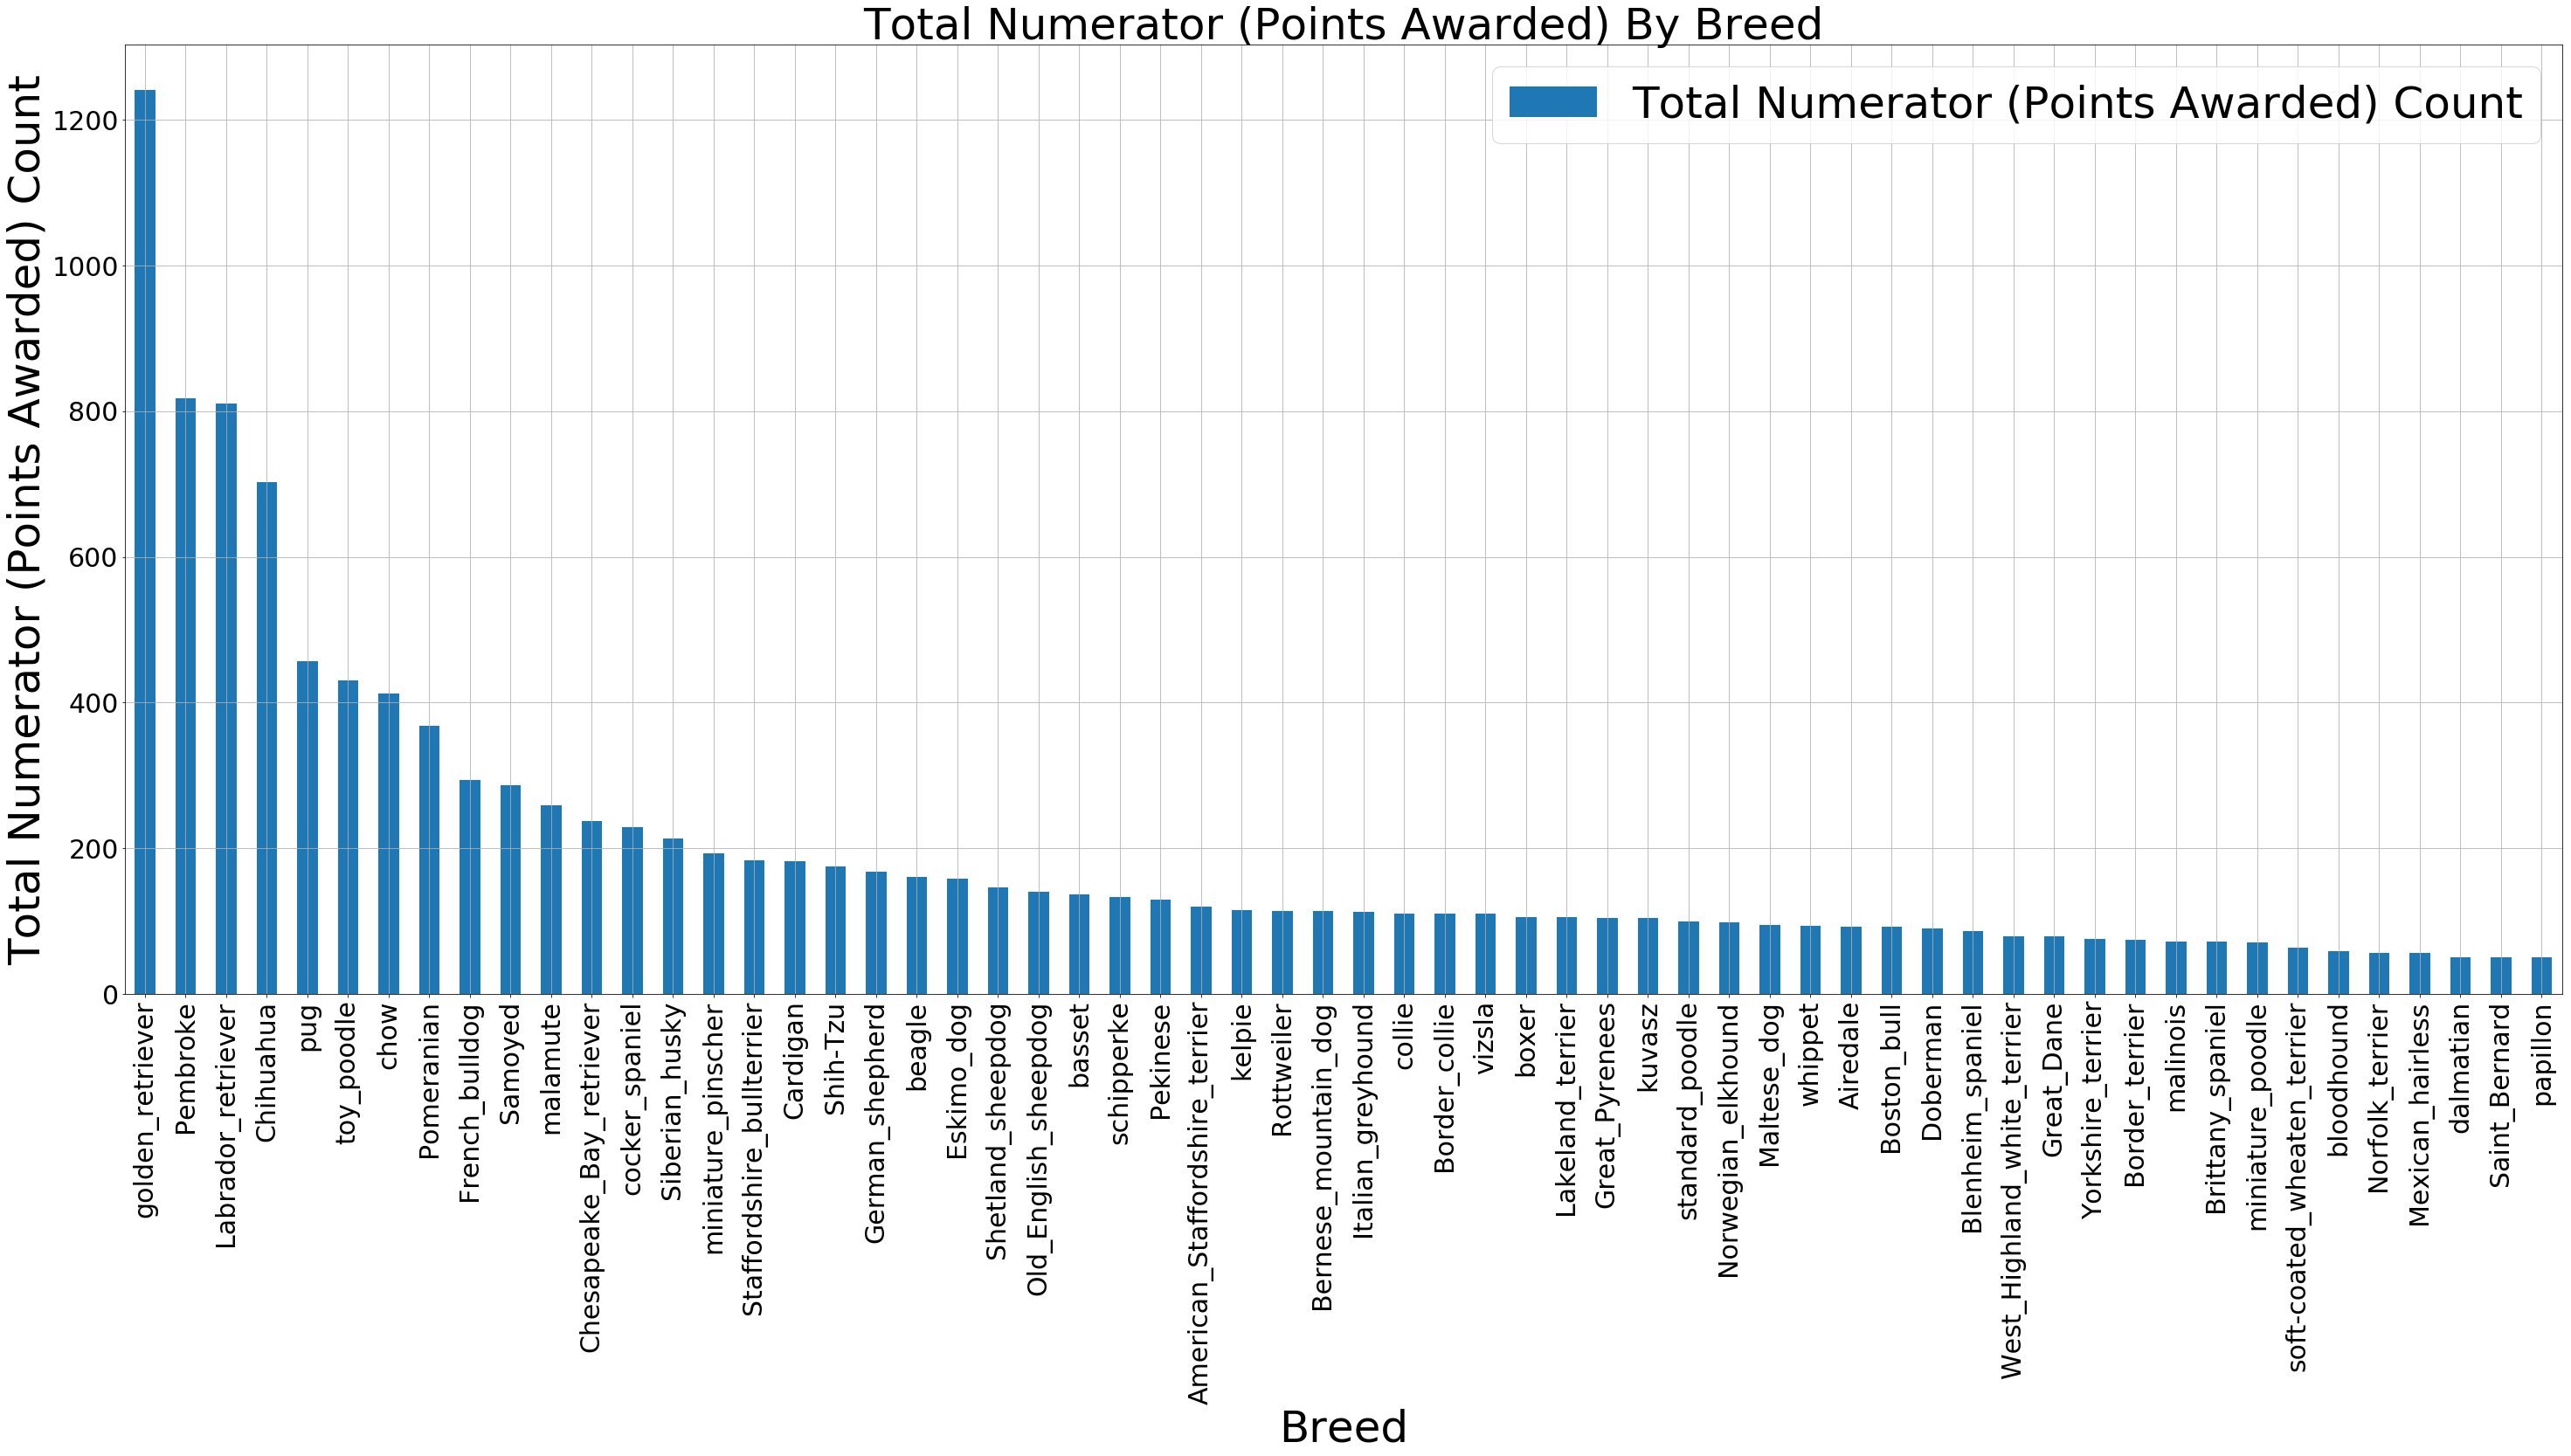

In [114]:
get_pareto(
    data_column = 'numerator',
    grp_by = 'breed',
    agg_function = 'sum',
    agg_label = 'Total Points',
    chart_title = 'Total Numerator (Points Awarded) By Breed',
    chart_xlabel = 'Breed',
    chart_ylabel = 'Total Numerator (Points Awarded) Count',
    chart_legend = 'Total Numerator (Points Awarded) Count',
    chart_filename = 'total_points_by_breed'
)

# Average Points

numerator               
                            Count Average Points
breed                                           
clumber                  1         27.000000    
Pomeranian               28        13.142857    
Appenzeller              1         13.000000    
Saluki                   3         12.333333    
Border_terrier           6         12.333333    
Irish_setter             3         12.000000    
standard_schnauzer       1         12.000000    
silky_terrier            1         12.000000    
briard                   1         12.000000    
Tibetan_mastiff          2         12.000000    
golden_retriever         105       11.819048    
bloodhound               5         11.800000    
Great_Pyrenees           9         11.555556    
Pembroke                 71        11.521127    
kelpie                   10        11.500000    
komondor                 2         11.500000    
Irish_terrier            2         11.500000    
wire-haired_fox_terrier  2         11.500000    
Australian_terrier       2         11.500000    
Samoyed                  25        11.480000

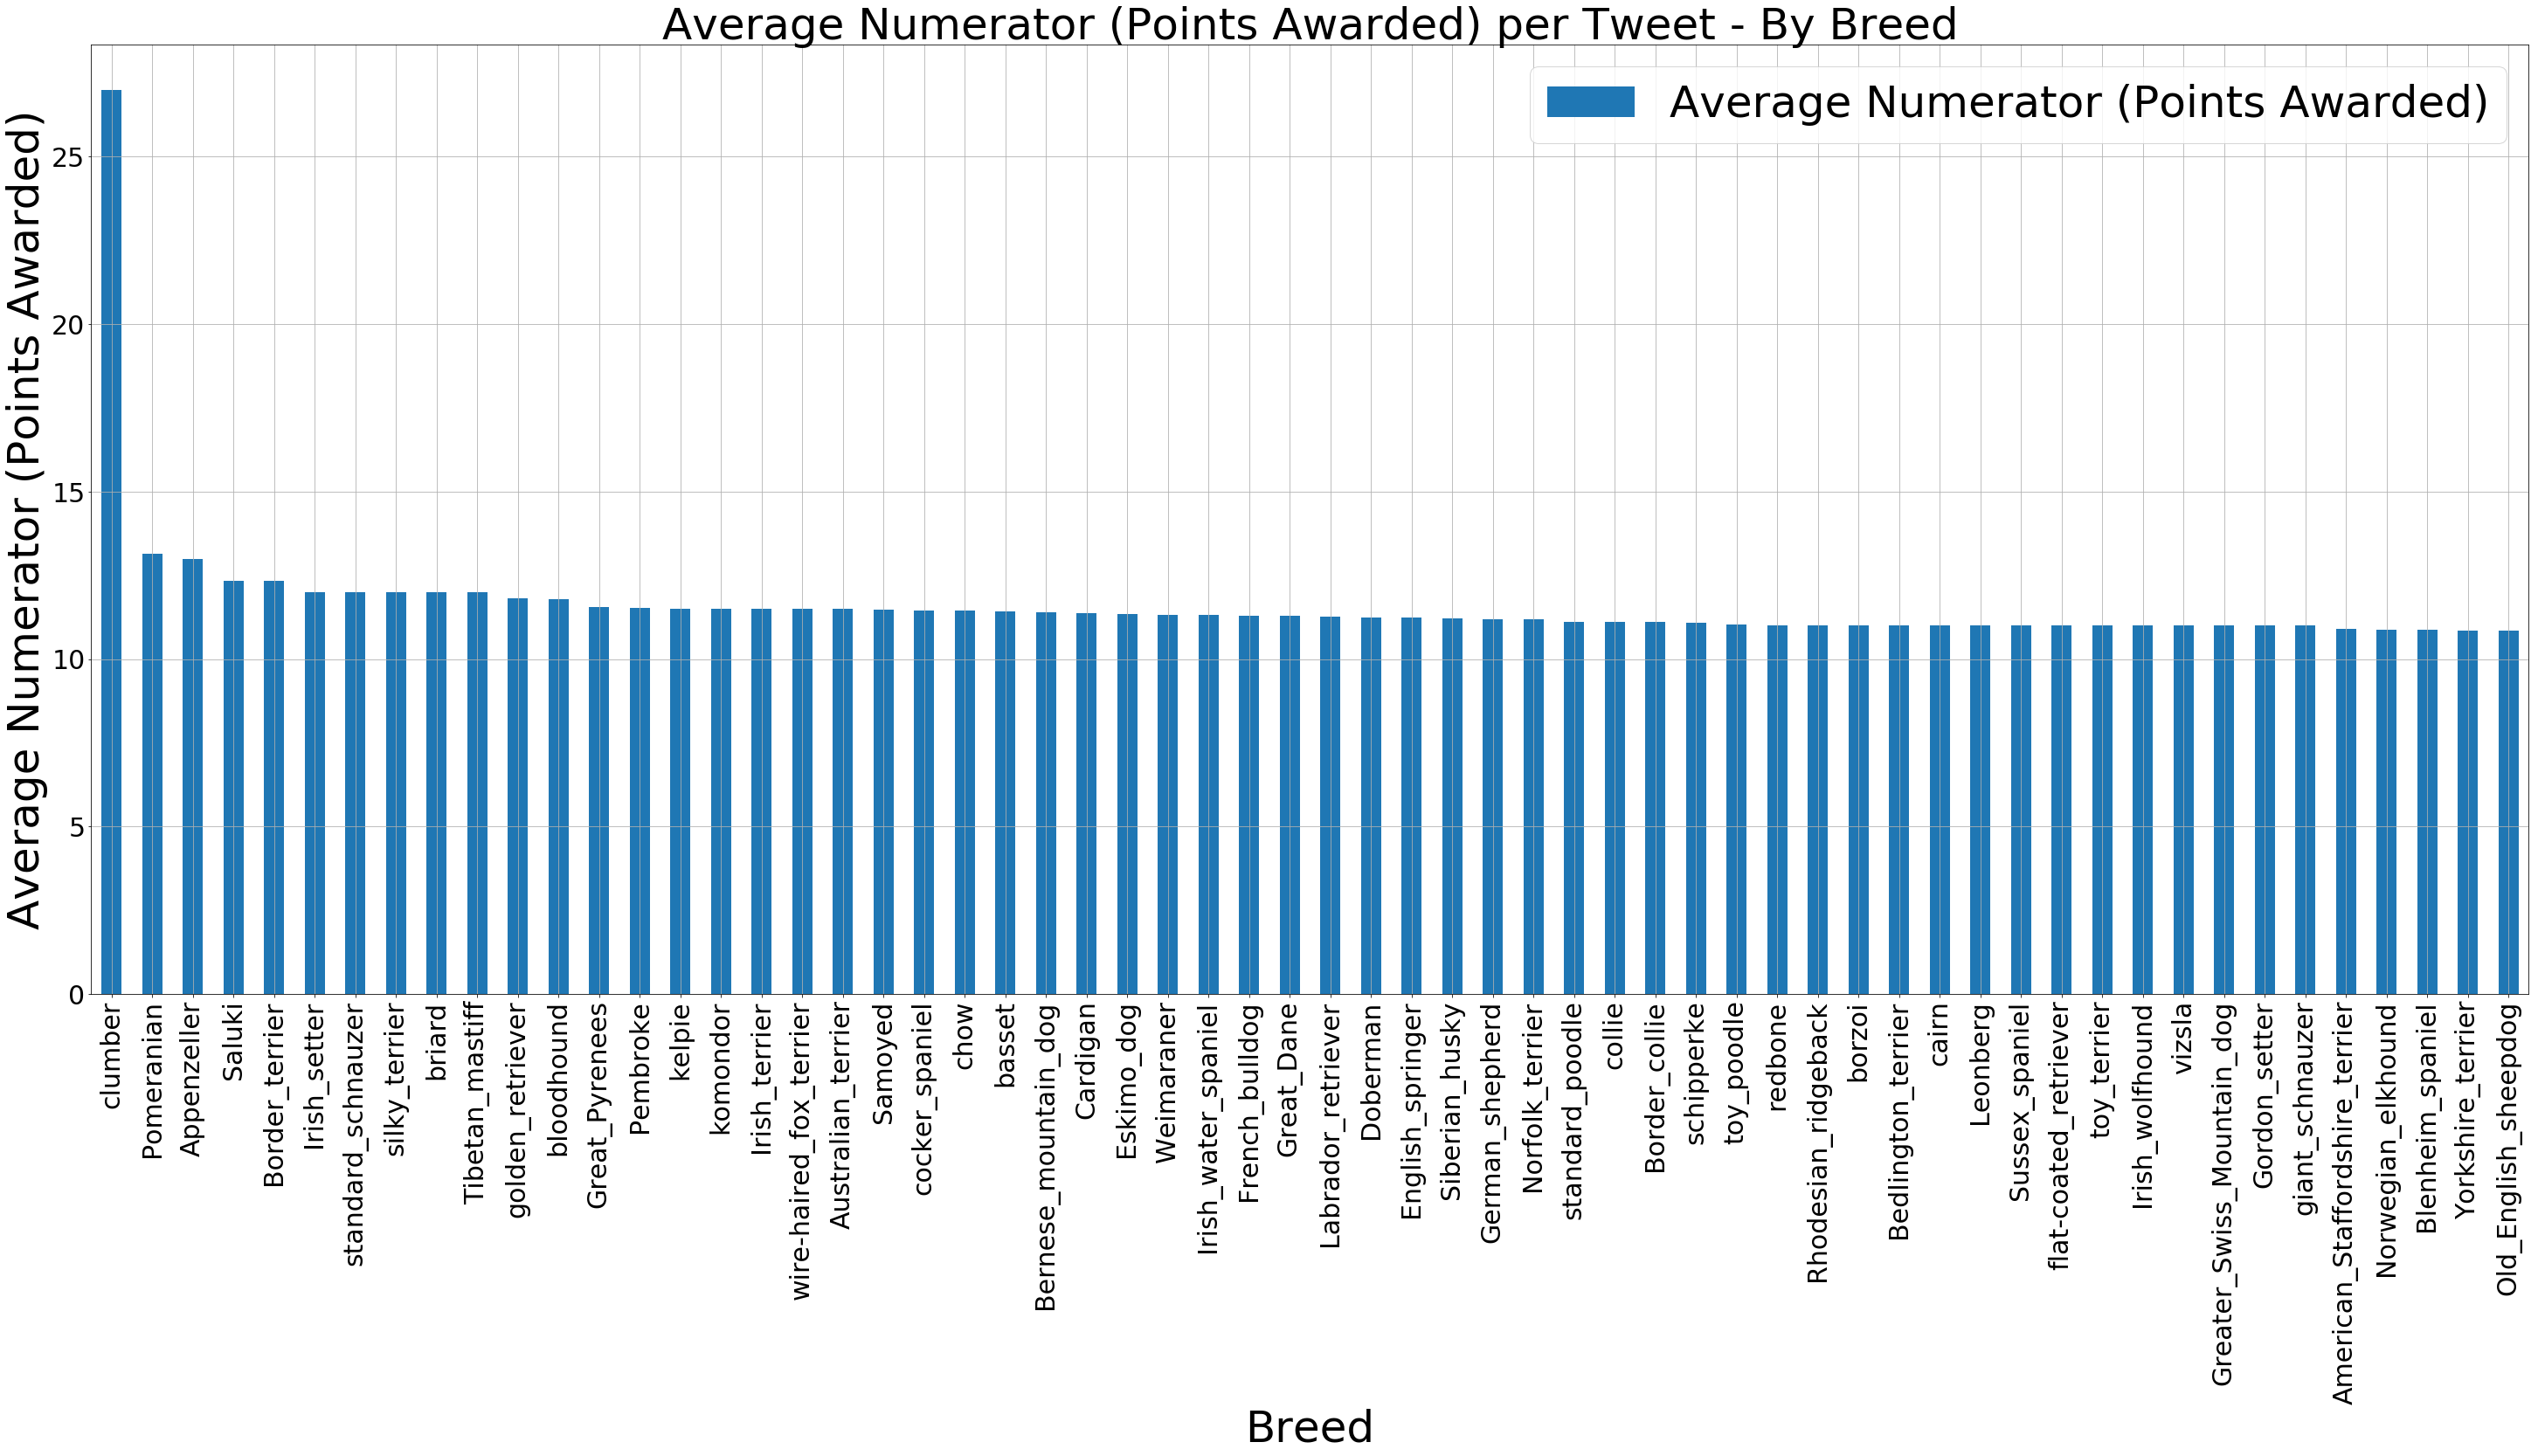

In [115]:
get_pareto(
    data_column = 'numerator',
    grp_by = 'breed',
    agg_function = 'mean',
    agg_label = 'Average Points',
    chart_title = 'Average Numerator (Points Awarded) per Tweet - By Breed',
    chart_xlabel = 'Breed',
    chart_ylabel = 'Average Numerator (Points Awarded)',
    chart_legend = 'Average Numerator (Points Awarded)',
    chart_filename = 'average_points_by_breed'
)

# Total Tweets

tweet_id                  
                             Count Total Tweet Count
breed                                               
golden_retriever           105      105             
Labrador_retriever         72       72              
Pembroke                   71       71              
Chihuahua                  67       67              
pug                        45       45              
toy_poodle                 39       39              
chow                       36       36              
Pomeranian                 28       28              
French_bulldog             26       26              
Samoyed                    25       25              
malamute                   24       24              
Chesapeake_Bay_retriever   22       22              
cocker_spaniel             20       20              
miniature_pinscher         19       19              
Siberian_husky             19       19              
Staffordshire_bullterrier  17       17              
Shih-Tzu                   17       17              
Cardigan                   16       16              
beagle                     16       16              
German_shepherd            15       15

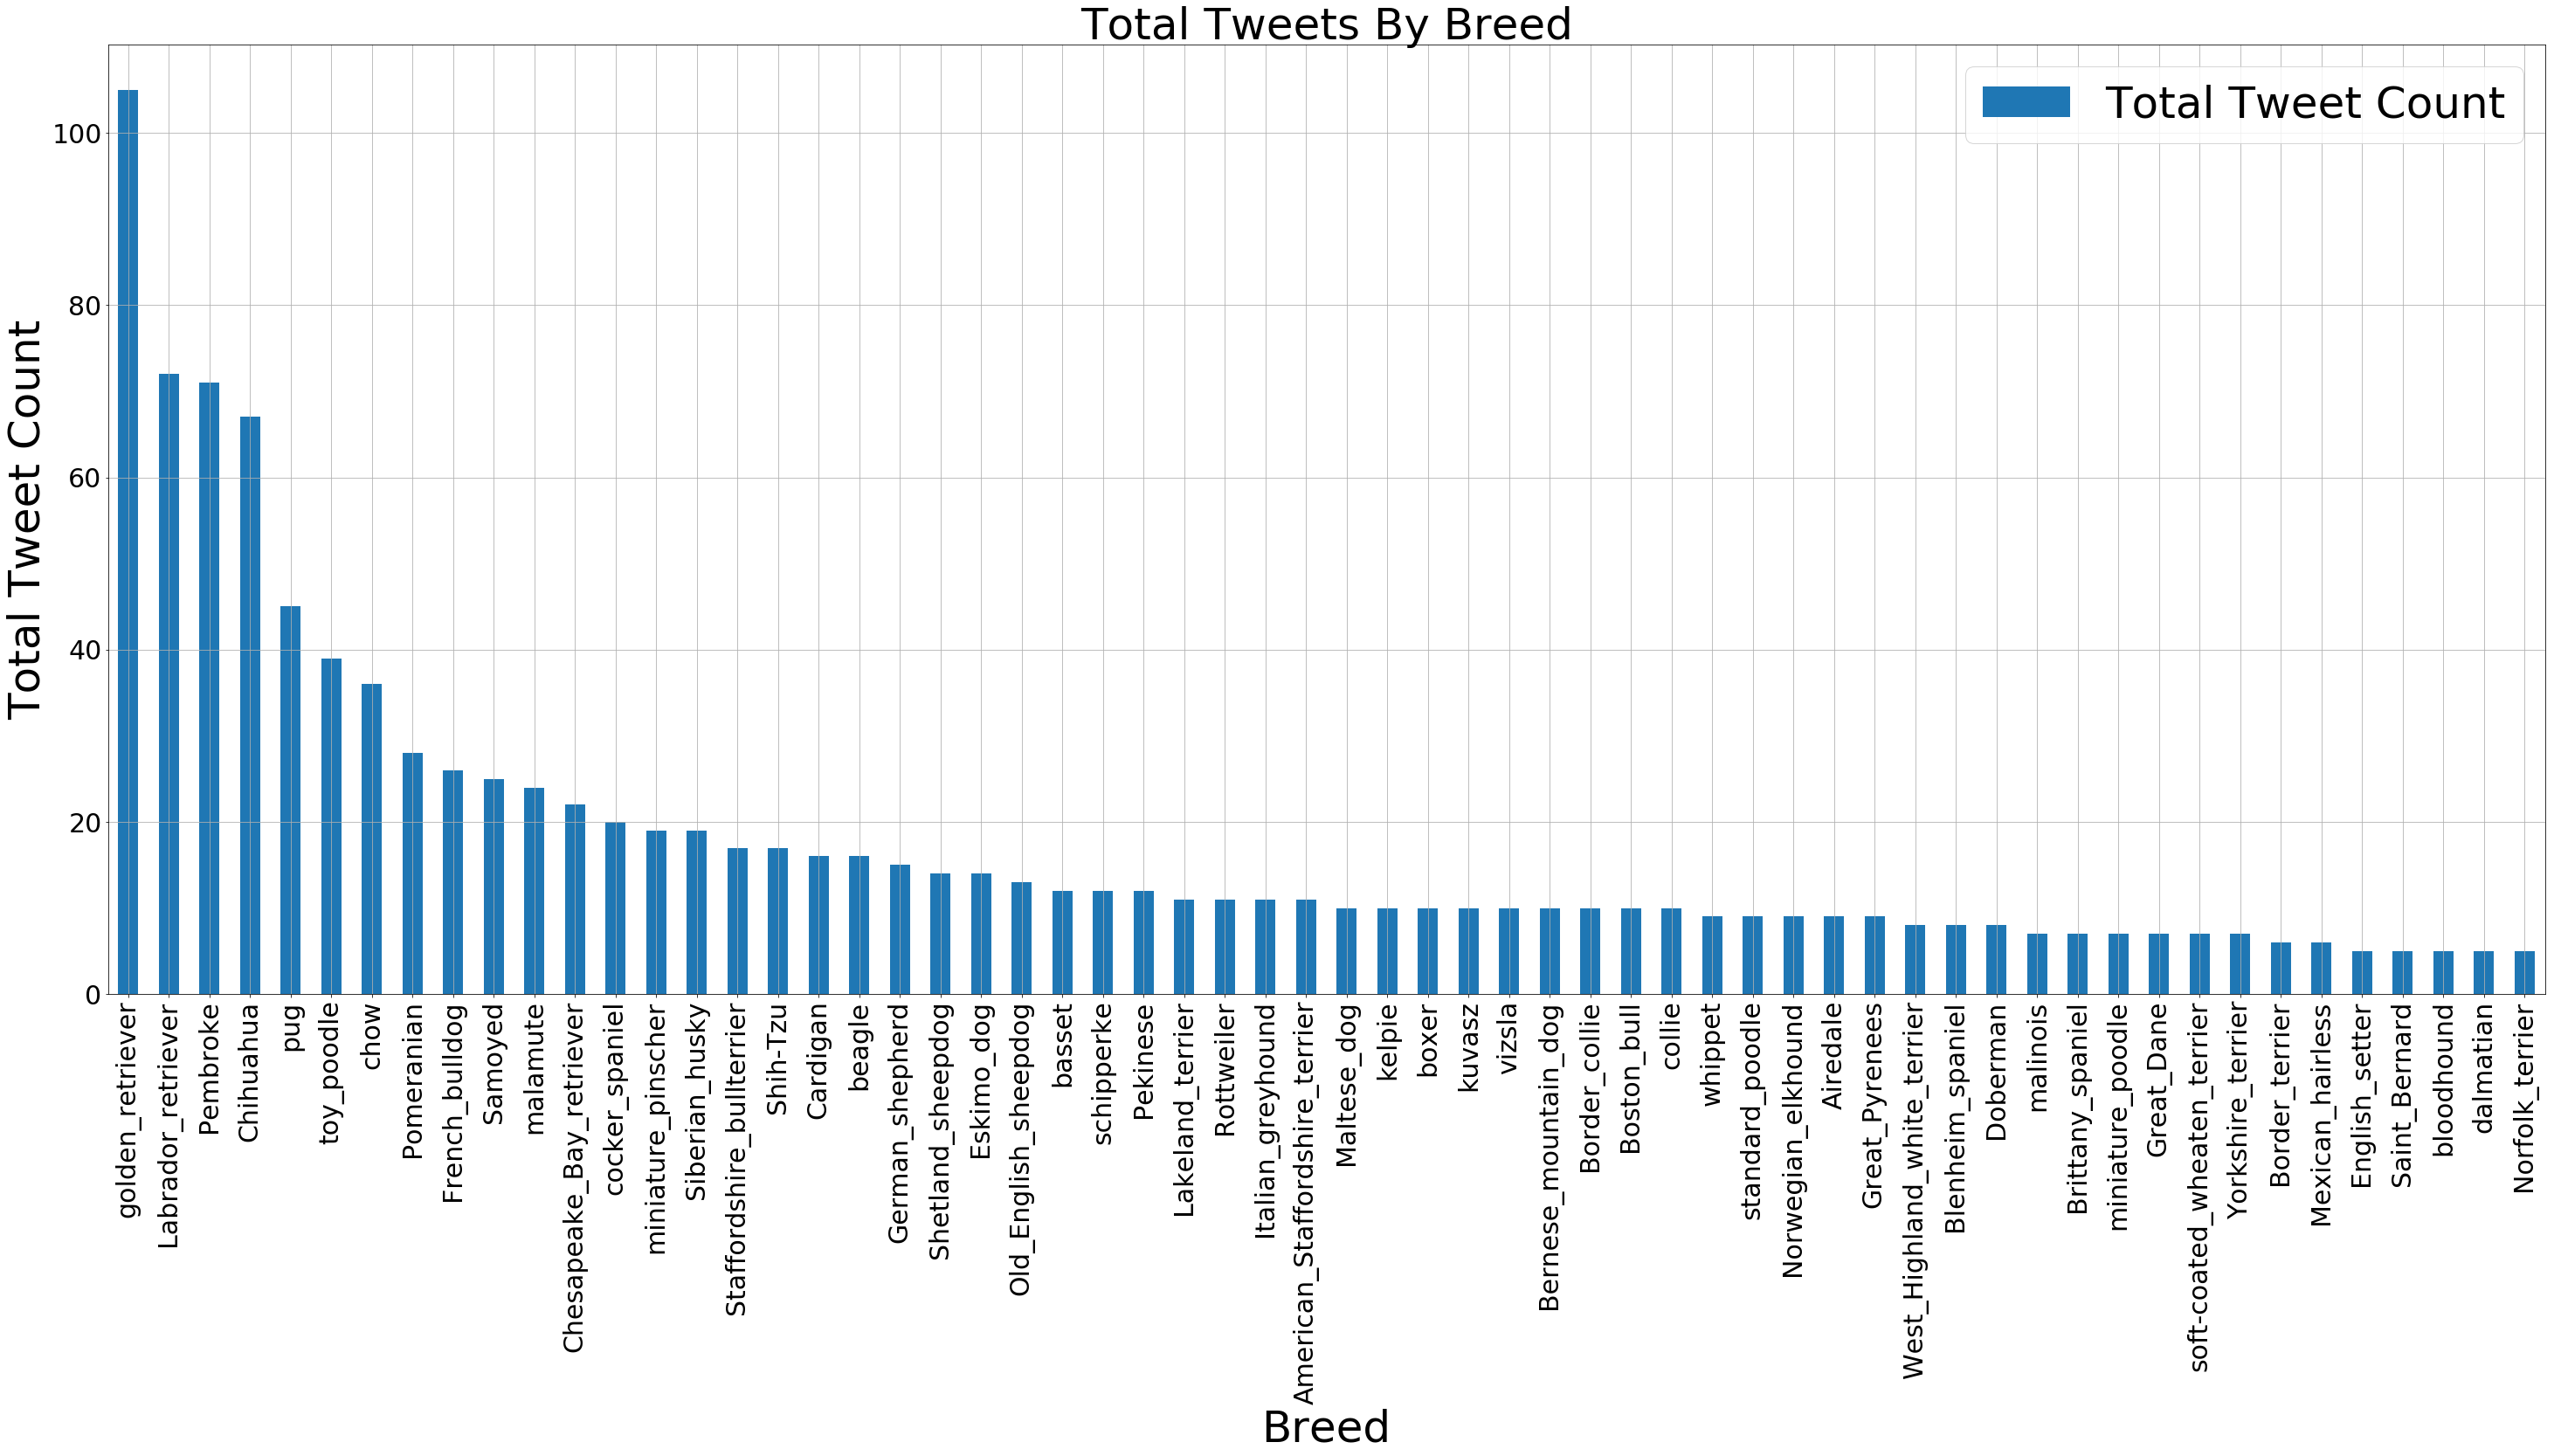

In [116]:
get_pareto(
    data_column = 'tweet_id',
    grp_by = 'breed',
    agg_function = 'count',
    agg_label = 'Total Tweet Count',
    chart_title = 'Total Tweets By Breed',
    chart_xlabel = 'Breed',
    chart_ylabel = 'Total Tweet Count',
    chart_legend = 'Total Tweet Count',
    chart_filename = 'total_tweets_by_breed'
)

# Total Favorites

fav_count                      
                              Count Total Favorite Counts
breed                                                    
golden_retriever           101       1321547.0           
Labrador_retriever         67        700828.0            
Pembroke                   67        692990.0            
Chihuahua                  66        588913.0            
French_bulldog             24        499698.0            
pug                        42        293172.0            
chow                       34        281897.0            
Samoyed                    23        253089.0            
toy_poodle                 34        246992.0            
cocker_spaniel             19        239965.0            
Chesapeake_Bay_retriever   21        210107.0            
Cardigan                   15        205277.0            
malamute                   21        194518.0            
Pomeranian                 26        174891.0            
basset                     12        160583.0            
miniature_pinscher         19        151306.0            
German_shepherd            15        144686.0            
whippet                    9         144575.0            
standard_poodle            9         138237.0            
Staffordshire_bullterrier  15        128227.0

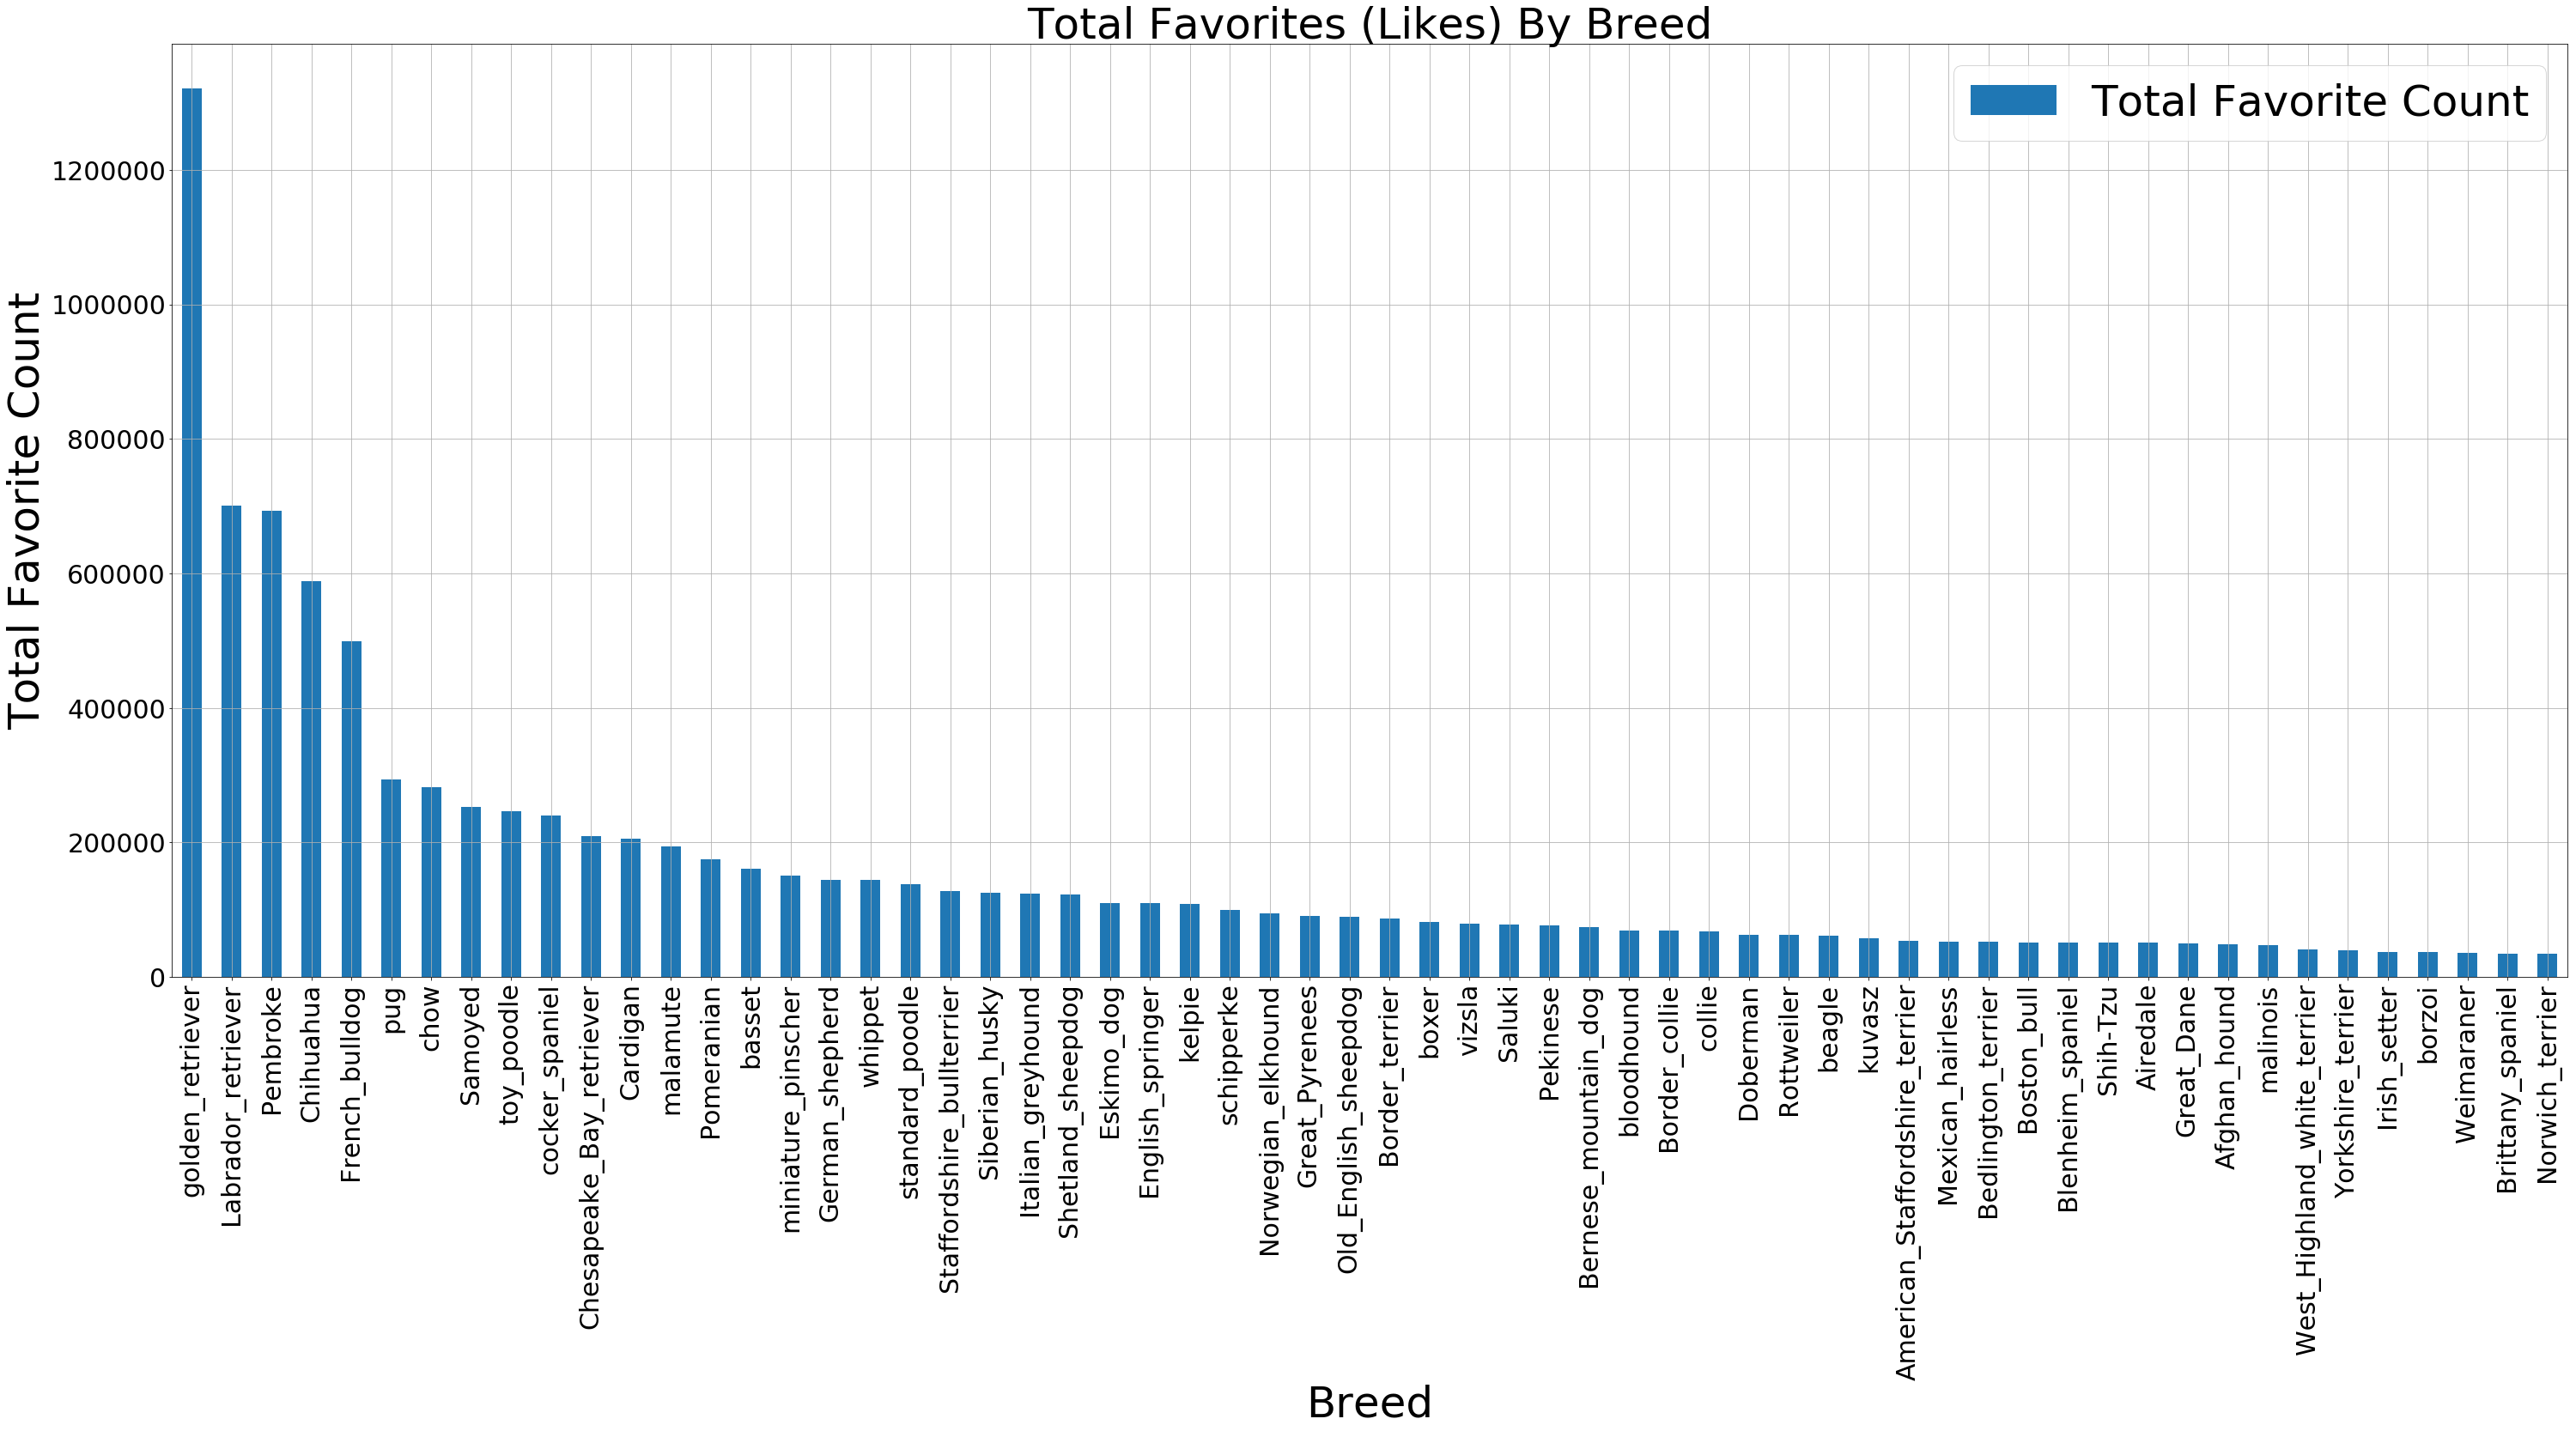

In [117]:
get_pareto(
    data_column = 'fav_count',
    grp_by = 'breed',
    agg_function = 'sum',
    agg_label = 'Total Favorite Counts',
    chart_title = 'Total Favorites (Likes) By Breed',
    chart_xlabel = 'Breed',
    chart_ylabel = 'Total Favorite Count',
    chart_legend = 'Total Favorite Count',
    chart_filename = 'total_favorites_by_breed'
)

# Average Favorites

fav_count                       
                        Count Averge Favorite Counts
breed                                               
English_springer     4         27570.000000         
Saluki               3         25877.333333         
French_bulldog       24        20820.750000         
Bedlington_terrier   3         17448.333333         
briard               1         17240.000000         
whippet              9         16063.888889         
Afghan_hound         3         16047.333333         
standard_poodle      9         15359.666667         
Leonberg             2         15253.500000         
Border_terrier       6         14483.833333         
Irish_terrier        2         14090.500000         
bloodhound           5         13913.400000         
Cardigan             15        13685.133333         
komondor             2         13403.000000         
basset               12        13381.916667         
golden_retriever     101       13084.623762         
Great_Pyrenees       7         13028.857143         
Irish_water_spaniel  2         12713.500000         
cocker_spaniel       19        12629.736842         
Irish_setter         3         12286.333333

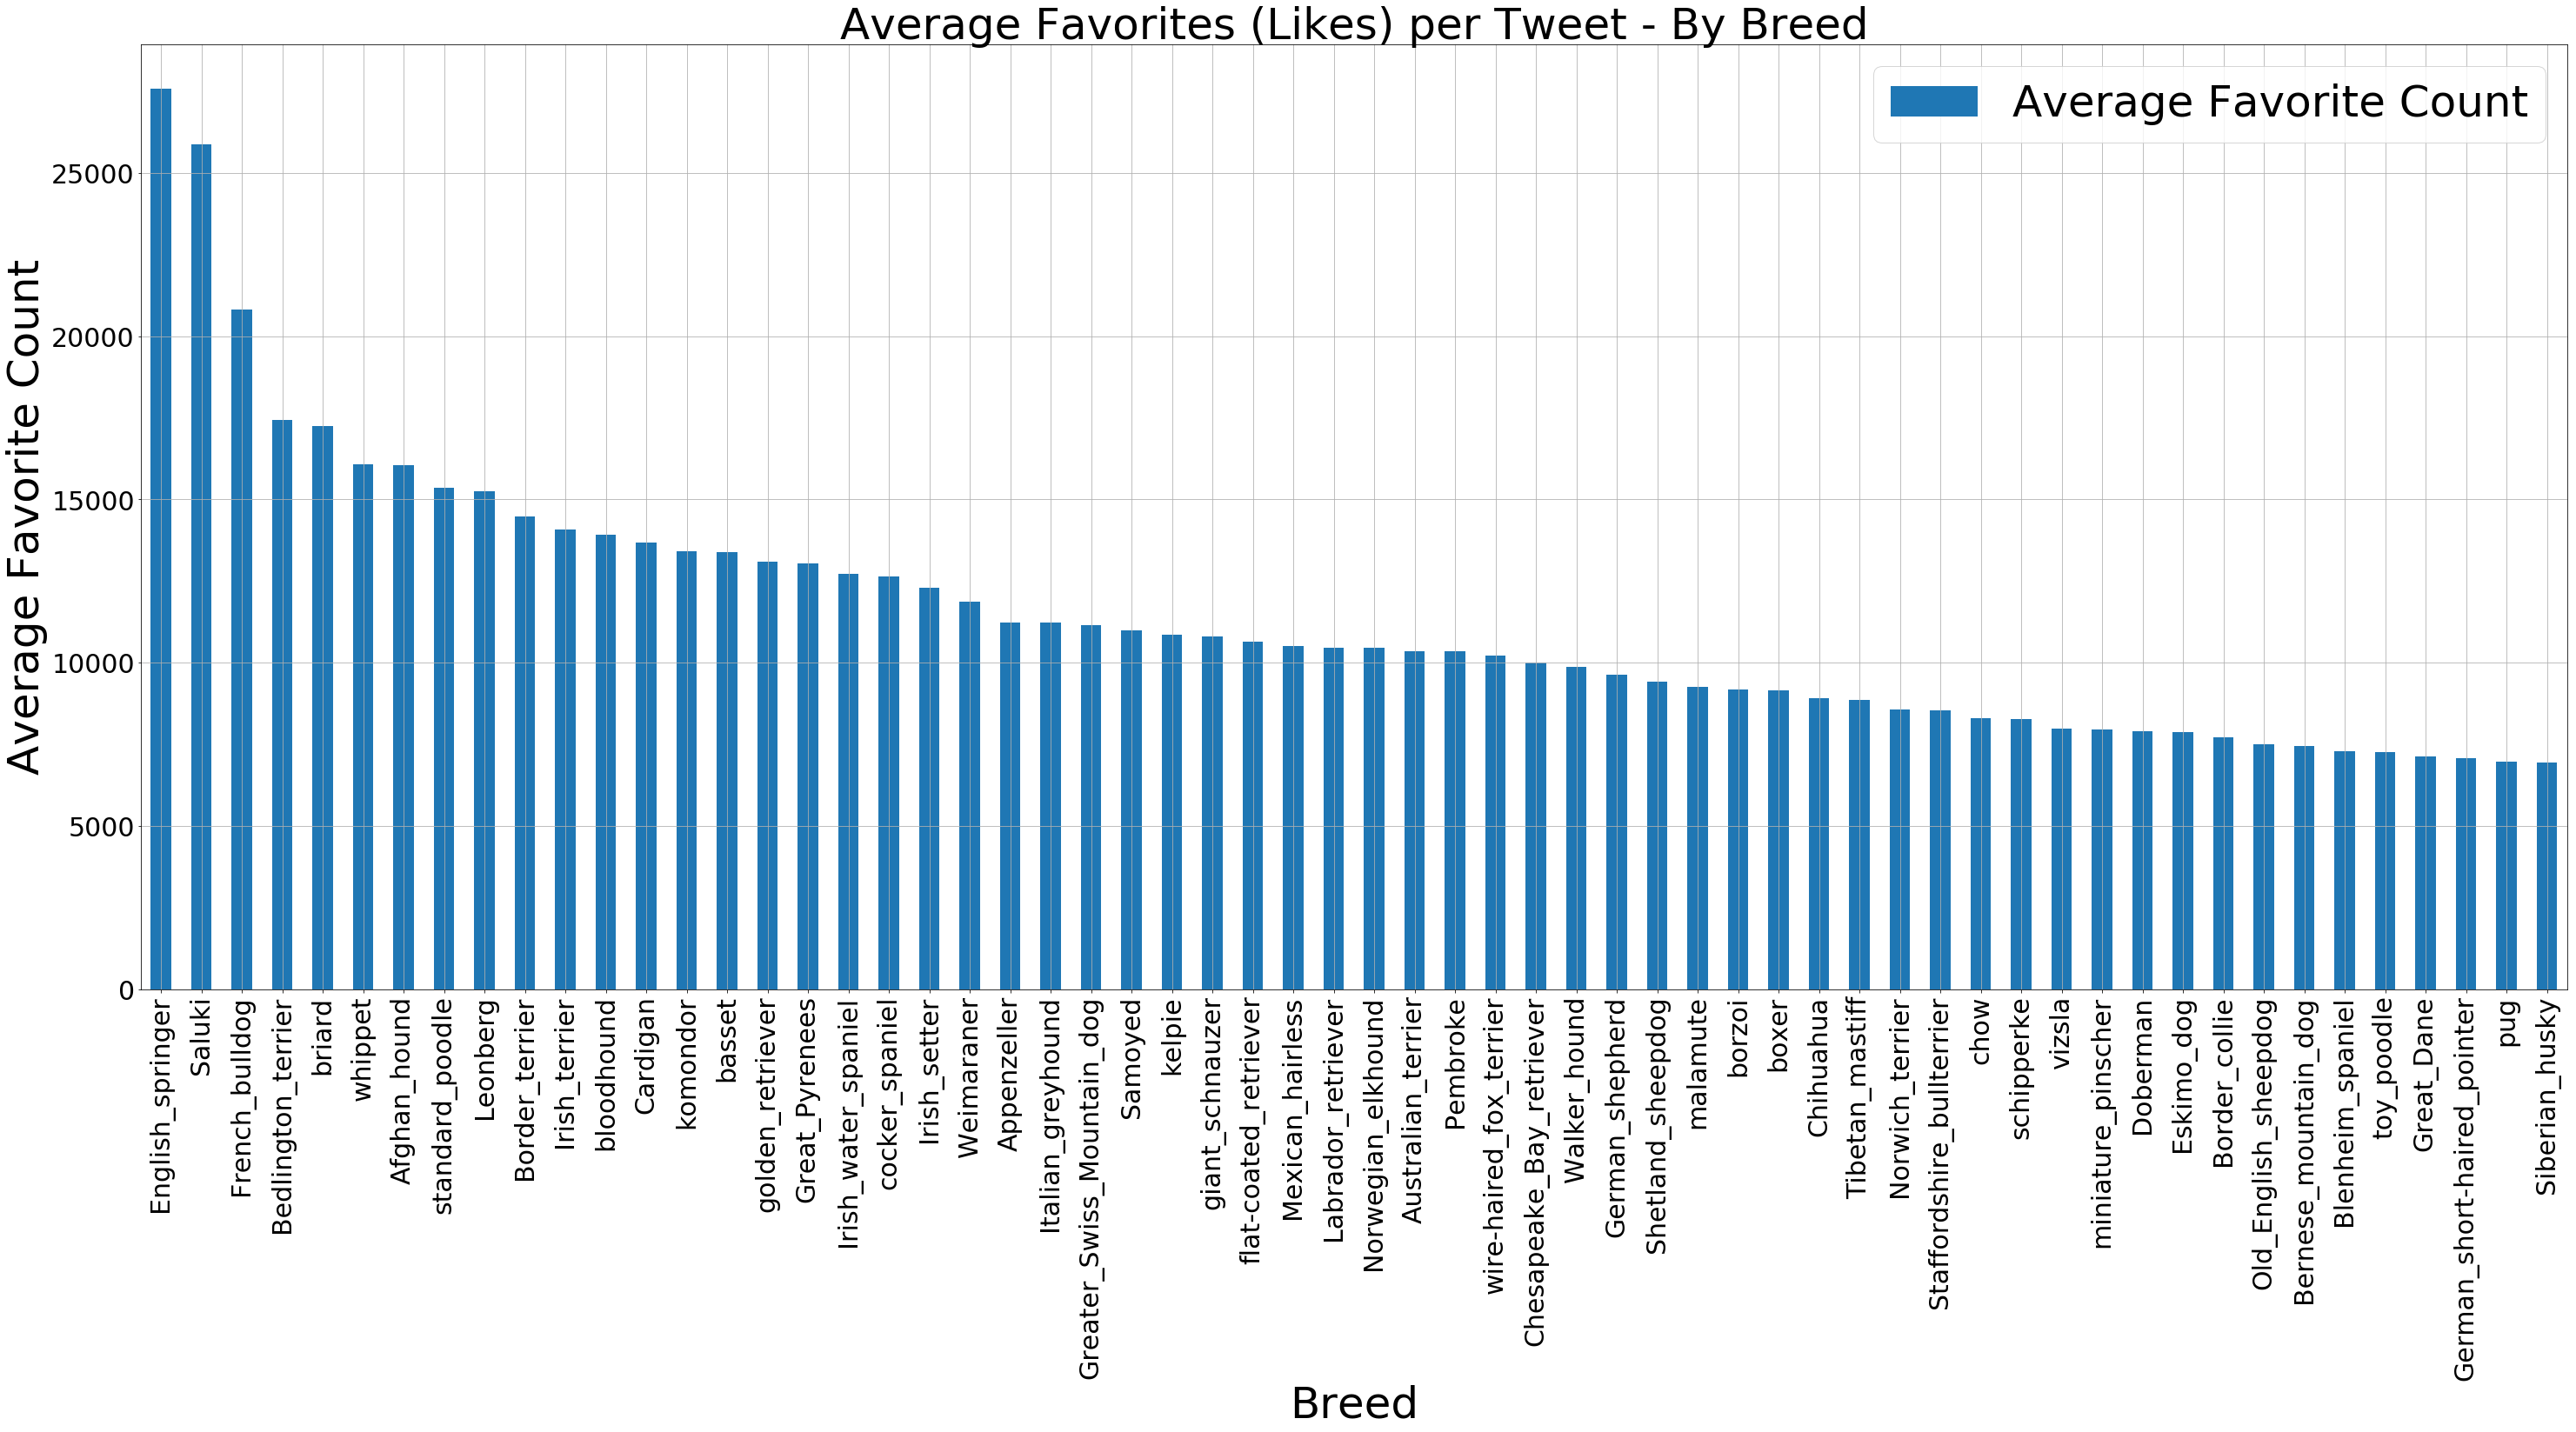

In [118]:
get_pareto(
    data_column = 'fav_count',
    grp_by = 'breed',
    agg_function = 'mean',
    agg_label = 'Averge Favorite Counts',
    chart_title = 'Average Favorites (Likes) per Tweet - By Breed',
    chart_xlabel = 'Breed',
    chart_ylabel = 'Average Favorite Count',
    chart_legend = 'Average Favorite Count',
    chart_filename = 'average_favorites_by_breed'
)

# Total Retweets

retweet_count               
                                 Count Total Retweets
breed                                                
golden_retriever          101           363826.0     
Chihuahua                 66            184590.0     
Labrador_retriever        67            183562.0     
Pembroke                  67            181718.0     
French_bulldog            24            122084.0     
Samoyed                   23            87013.0      
pug                       42            85882.0      
toy_poodle                34            82886.0      
chow                      34            77768.0      
cocker_spaniel            19            77297.0      
Pomeranian                26            61794.0      
Cardigan                  15            59784.0      
malamute                  21            55309.0      
standard_poodle           9             53204.0      
Chesapeake_Bay_retriever  21            52880.0      
whippet                   9             48541.0      
English_springer          4             44058.0      
miniature_pinscher        19            43461.0      
basset                    12            33585.0      
German_shepherd           15            33469.0

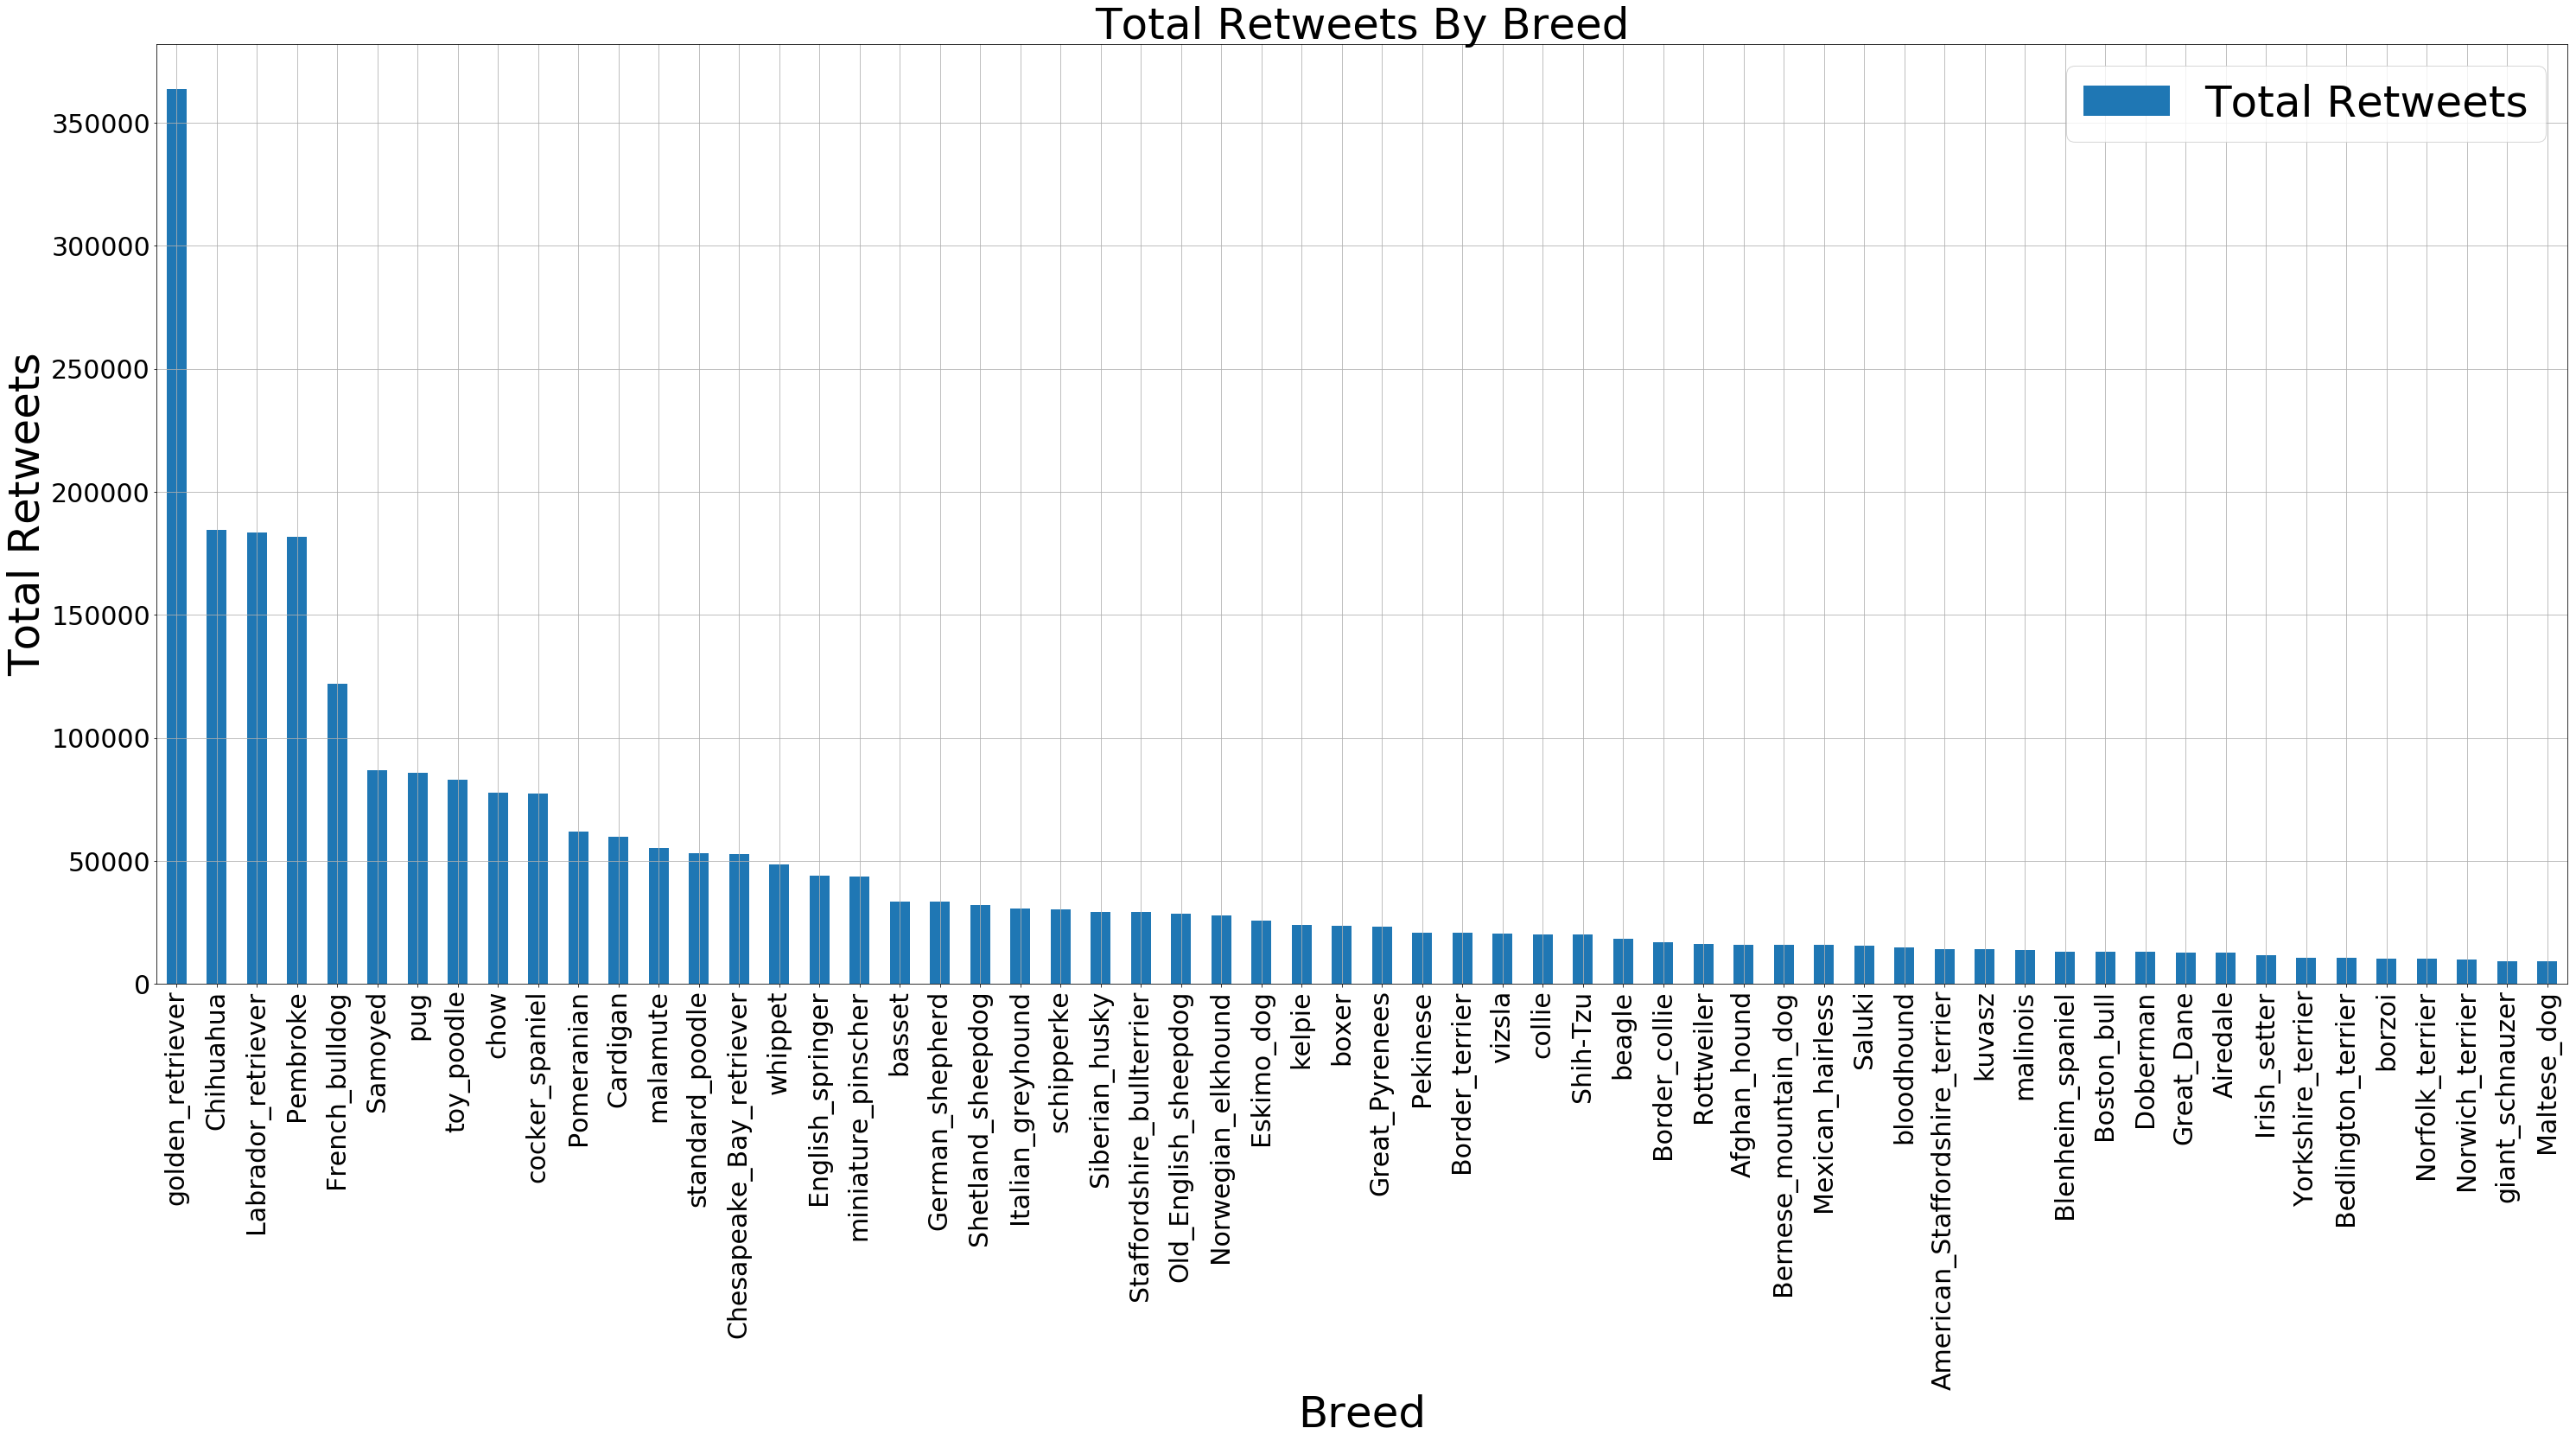

In [119]:
get_pareto(
    data_column = 'retweet_count',
    grp_by = 'breed',
    agg_function = 'sum',
    agg_label = 'Total Retweets',
    chart_title = 'Total Retweets By Breed',
    chart_xlabel = 'Breed',
    chart_ylabel = 'Total Retweets',
    chart_legend = 'Total Retweets',
    chart_filename = 'total_retweets_by_breed'
)

# Average Retweets

retweet_count                 
                           Count Average Retweets
breed                                            
English_springer    4             11014.500000   
standard_poodle     9             5911.555556    
briard              1             5791.000000    
whippet             9             5393.444444    
Afghan_hound        3             5330.666667    
Saluki              3             5225.666667    
French_bulldog      24            5086.833333    
cocker_spaniel      19            4068.263158    
Cardigan            15            3985.600000    
Walker_hound        2             3896.500000    
Irish_setter        3             3859.333333    
Leonberg            2             3841.500000    
Samoyed             23            3783.173913    
golden_retriever    101           3602.237624    
Bedlington_terrier  3             3483.666667    
Border_terrier      6             3467.500000    
Great_Pyrenees      7             3338.428571    
Mexican_hairless    5             3163.800000    
giant_schnauzer     3             3095.333333    
Norwegian_elkhound  9             3072.666667

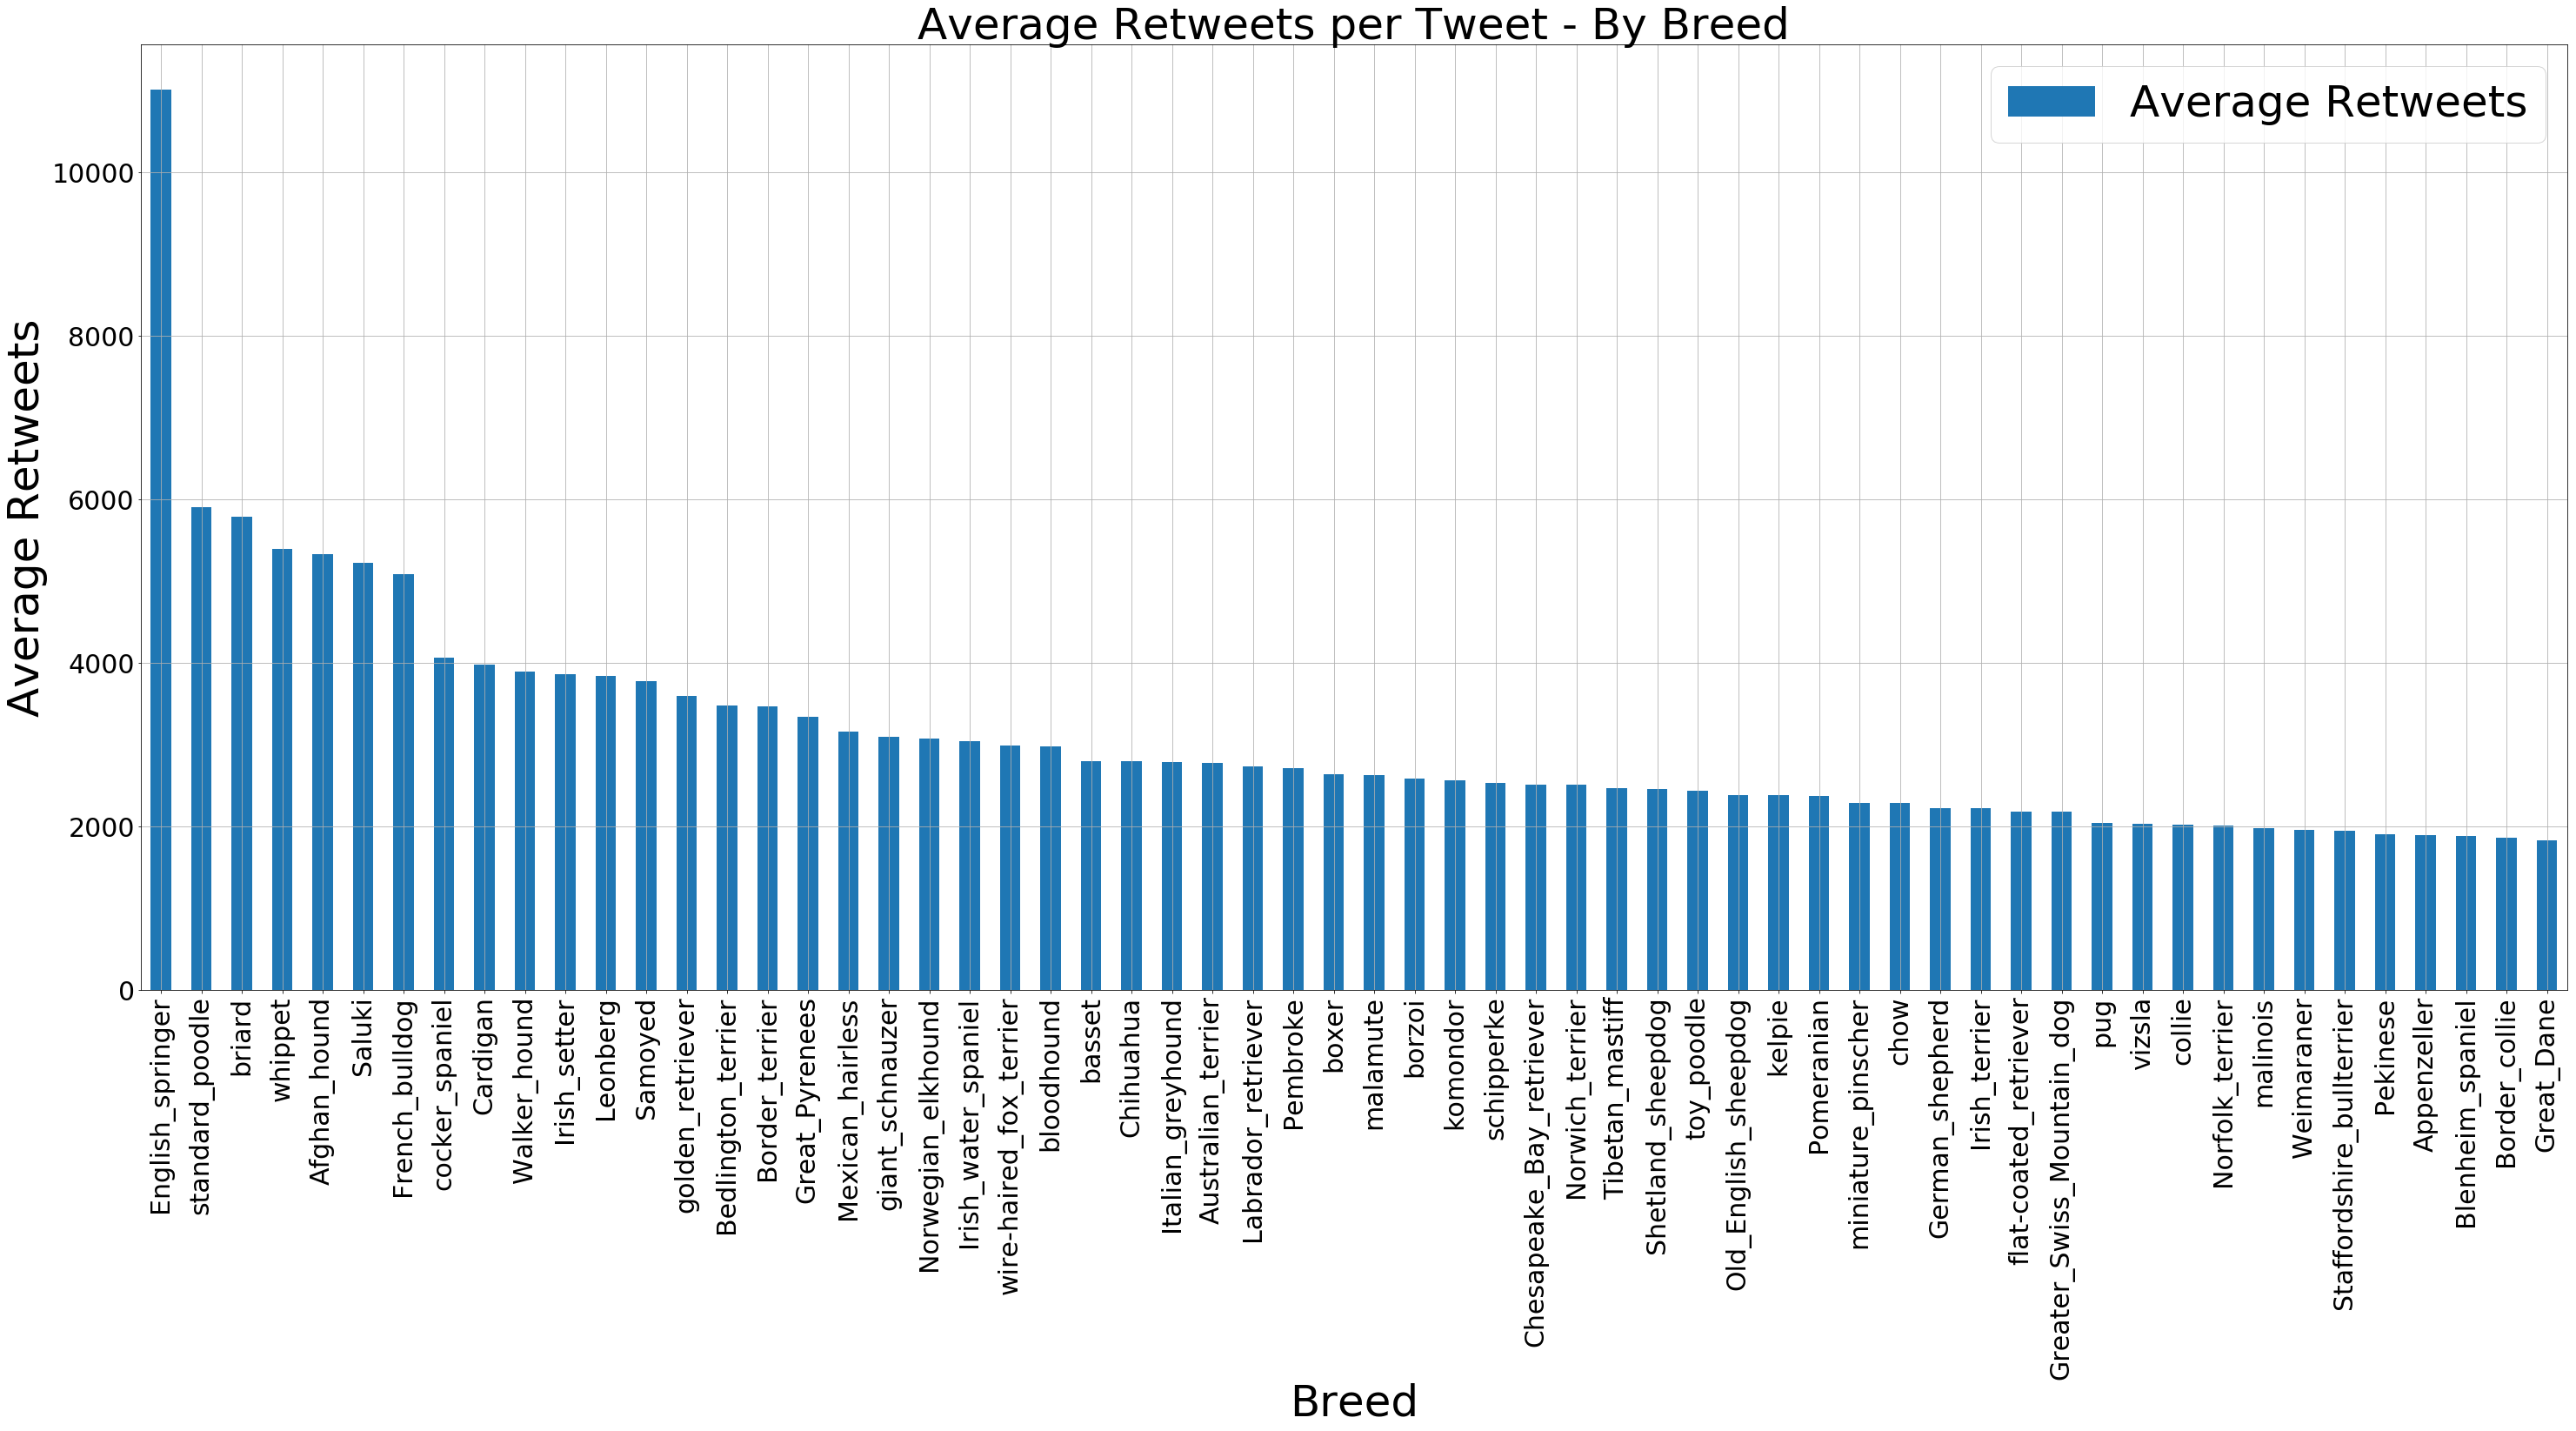

In [120]:
get_pareto(
    data_column = 'retweet_count',
    grp_by = 'breed',
    agg_function = 'mean',
    agg_label = 'Average Retweets',
    chart_title = 'Average Retweets per Tweet - By Breed',
    chart_xlabel = 'Breed',
    chart_ylabel = 'Average Retweets',
    chart_legend = 'Average Retweets',
    chart_filename = 'average_retweets_by_breed'
)

# Average Confidence

conf                   
                      Count Average Confidence
breed                                         
komondor               2     0.958819         
clumber                1     0.946718         
Tibetan_mastiff        2     0.936126         
keeshond               4     0.844431         
bull_mastiff           4     0.833571         
Brittany_spaniel       7     0.781640         
Bernese_mountain_dog   10    0.778240         
Leonberg               2     0.766436         
Samoyed                25    0.758255         
vizsla                 10    0.752500         
Doberman               8     0.724541         
German_shepherd        15    0.722964         
Pomeranian             28    0.713732         
Blenheim_spaniel       8     0.712449         
French_bulldog         26    0.690590         
pug                    45    0.669514         
Pembroke               71    0.664216         
flat-coated_retriever  3     0.663999         
Japanese_spaniel       1     0.661178         
golden_retriever       105   0.653802

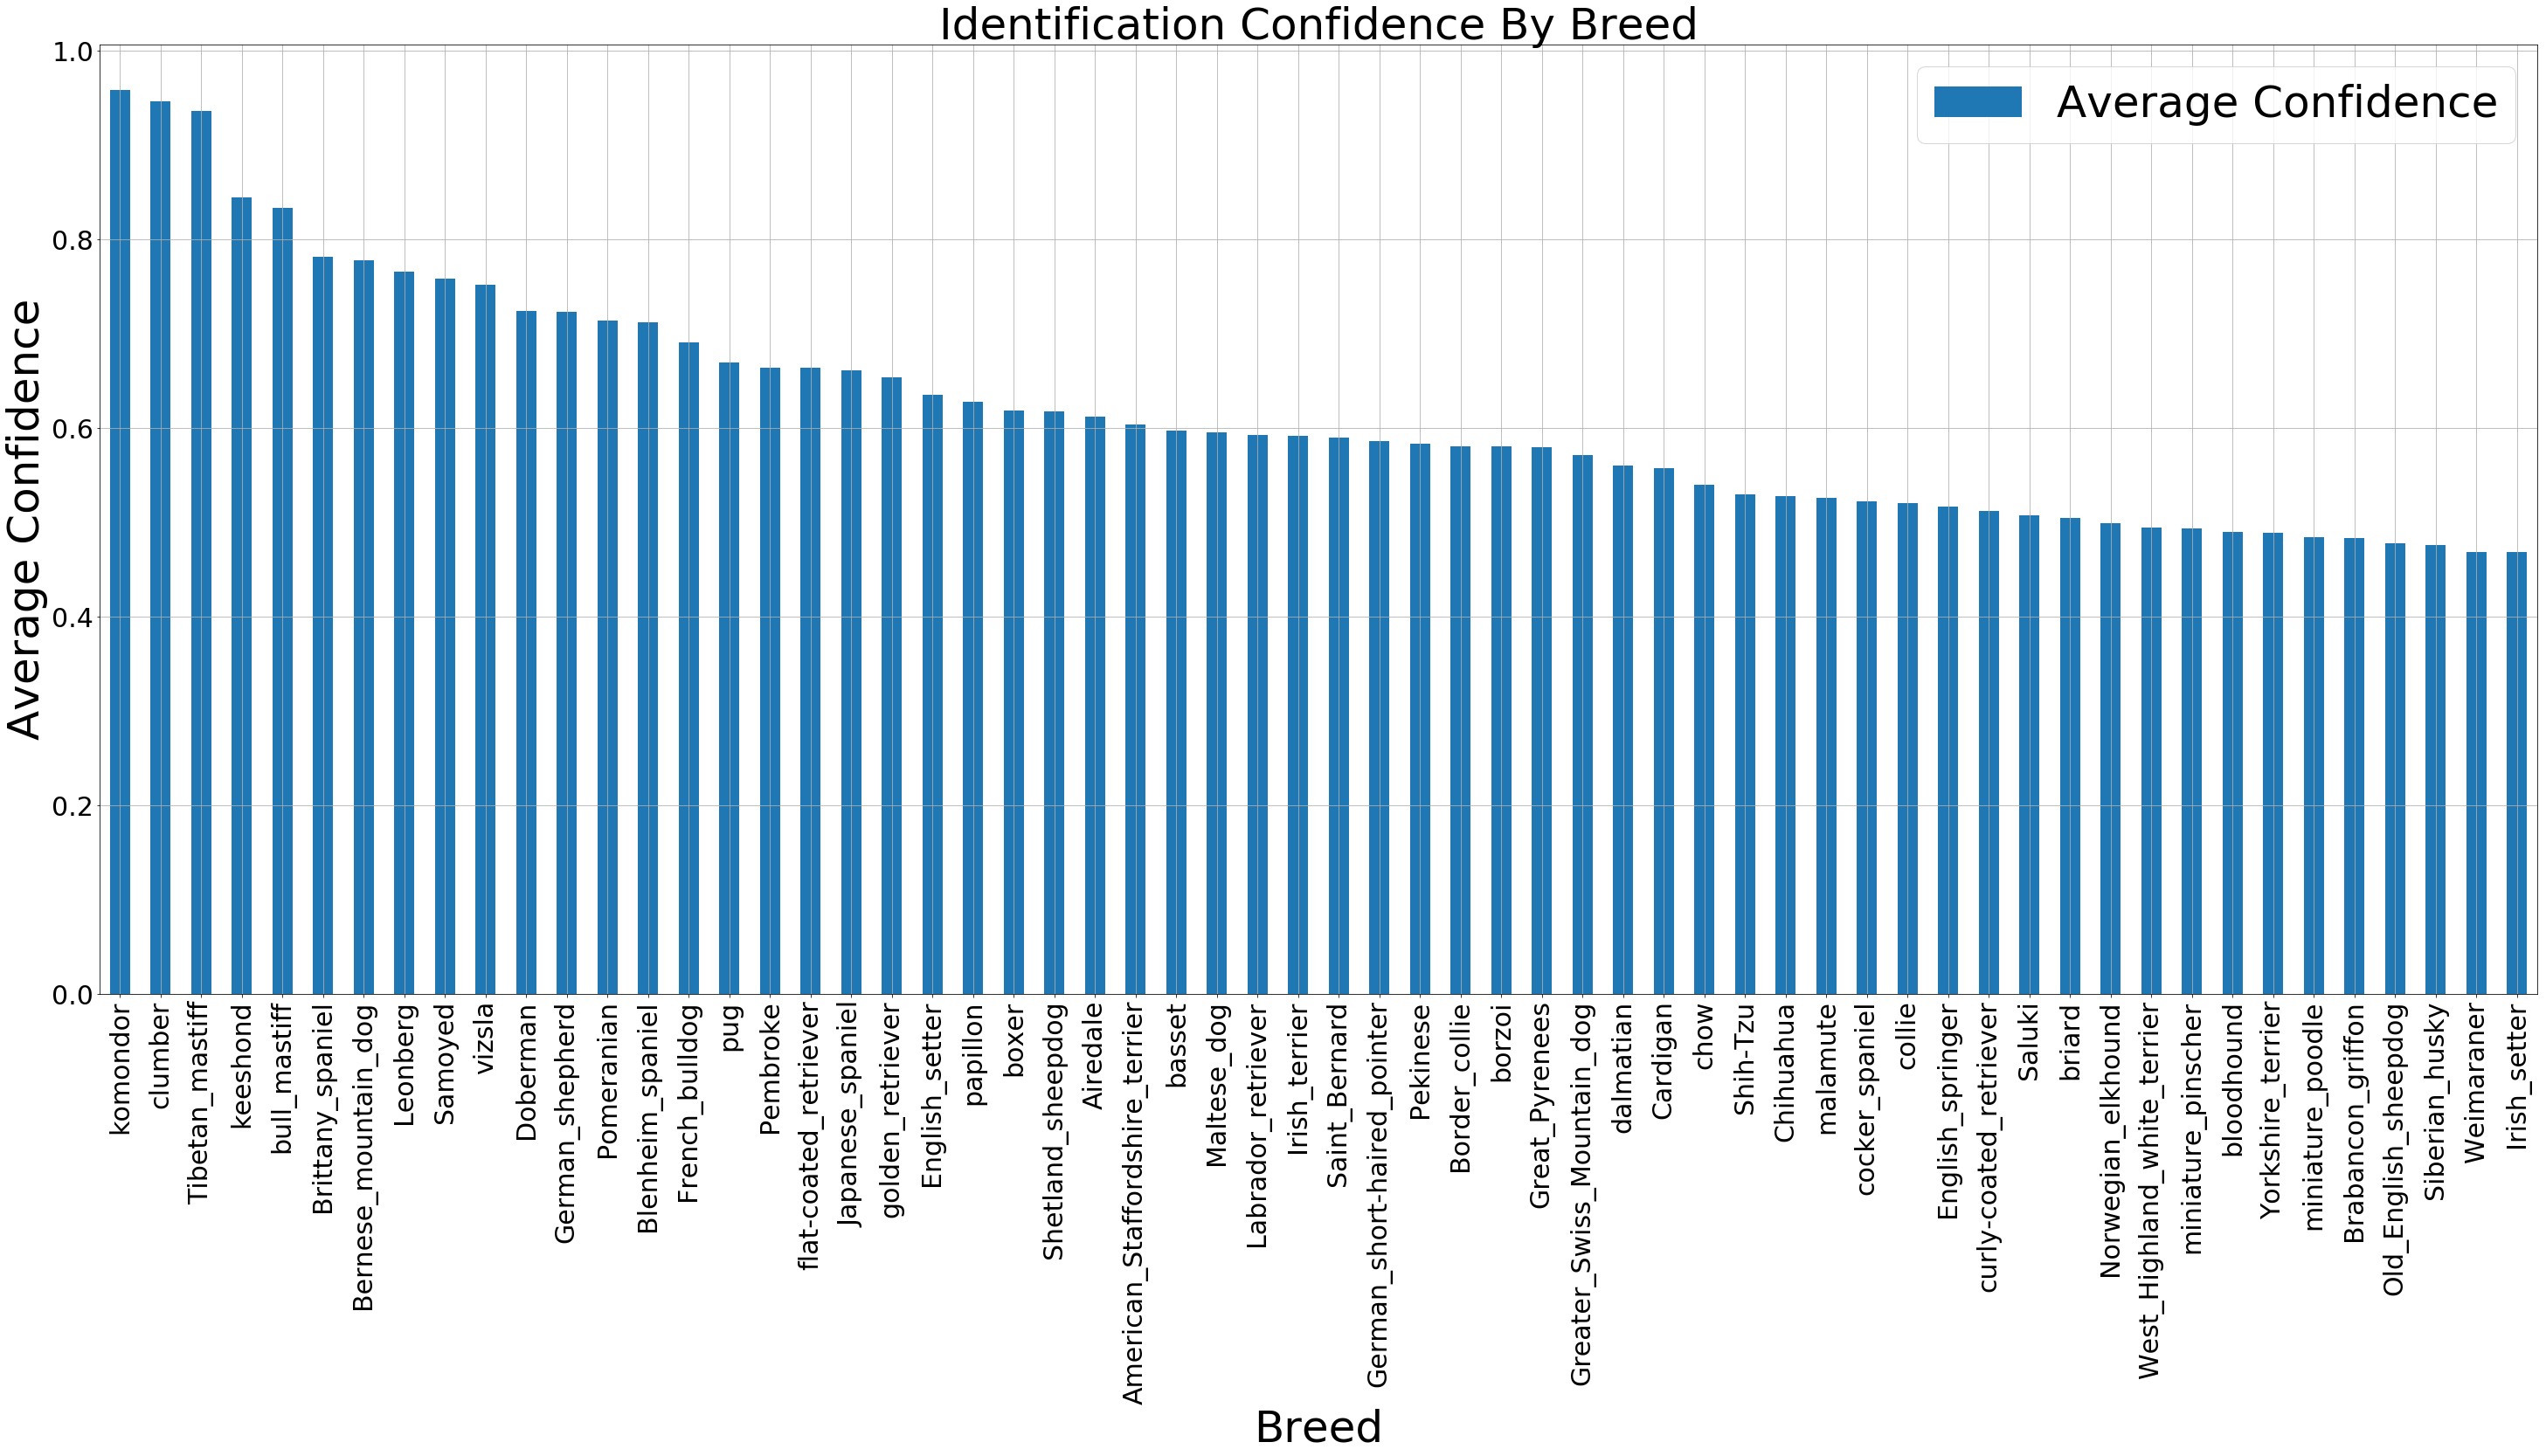

In [121]:
get_pareto(
    data_column = 'conf',
    grp_by = 'breed',
    agg_function = 'mean',
    agg_label = 'Average Confidence',
    chart_title = 'Identification Confidence By Breed',
    chart_xlabel = 'Breed',
    chart_ylabel = 'Average Confidence',
    chart_legend = 'Average Confidence',
    chart_filename = 'average_conf_by_breed'
)

fav_count                       
                             Count Maximum Favorite Count
breed                                                    
Chihuahua                 66        122846.0             
French_bulldog            24        118335.0             
English_springer          4         100902.0             
standard_poodle           9         89630.0              
golden_retriever          101       79663.0              
Chesapeake_Bay_retriever  21        75844.0              
whippet                   9         75621.0              
Italian_greyhound         11        73623.0              
Labrador_retriever        67        68366.0              
Pembroke                  67        65591.0              
boxer                     9         54307.0              
cocker_spaniel            19        53418.0              
Samoyed                   23        50767.0              
Saluki                    3         48256.0              
toy_poodle                34        46368.0              
basset                    12        38339.0              
Mexican_hairless          5         37440.0              
Great_Pyrenees            7         37312.0              
malamute                  21        36581.0              
Shetland_sheepdog         13        36174.0

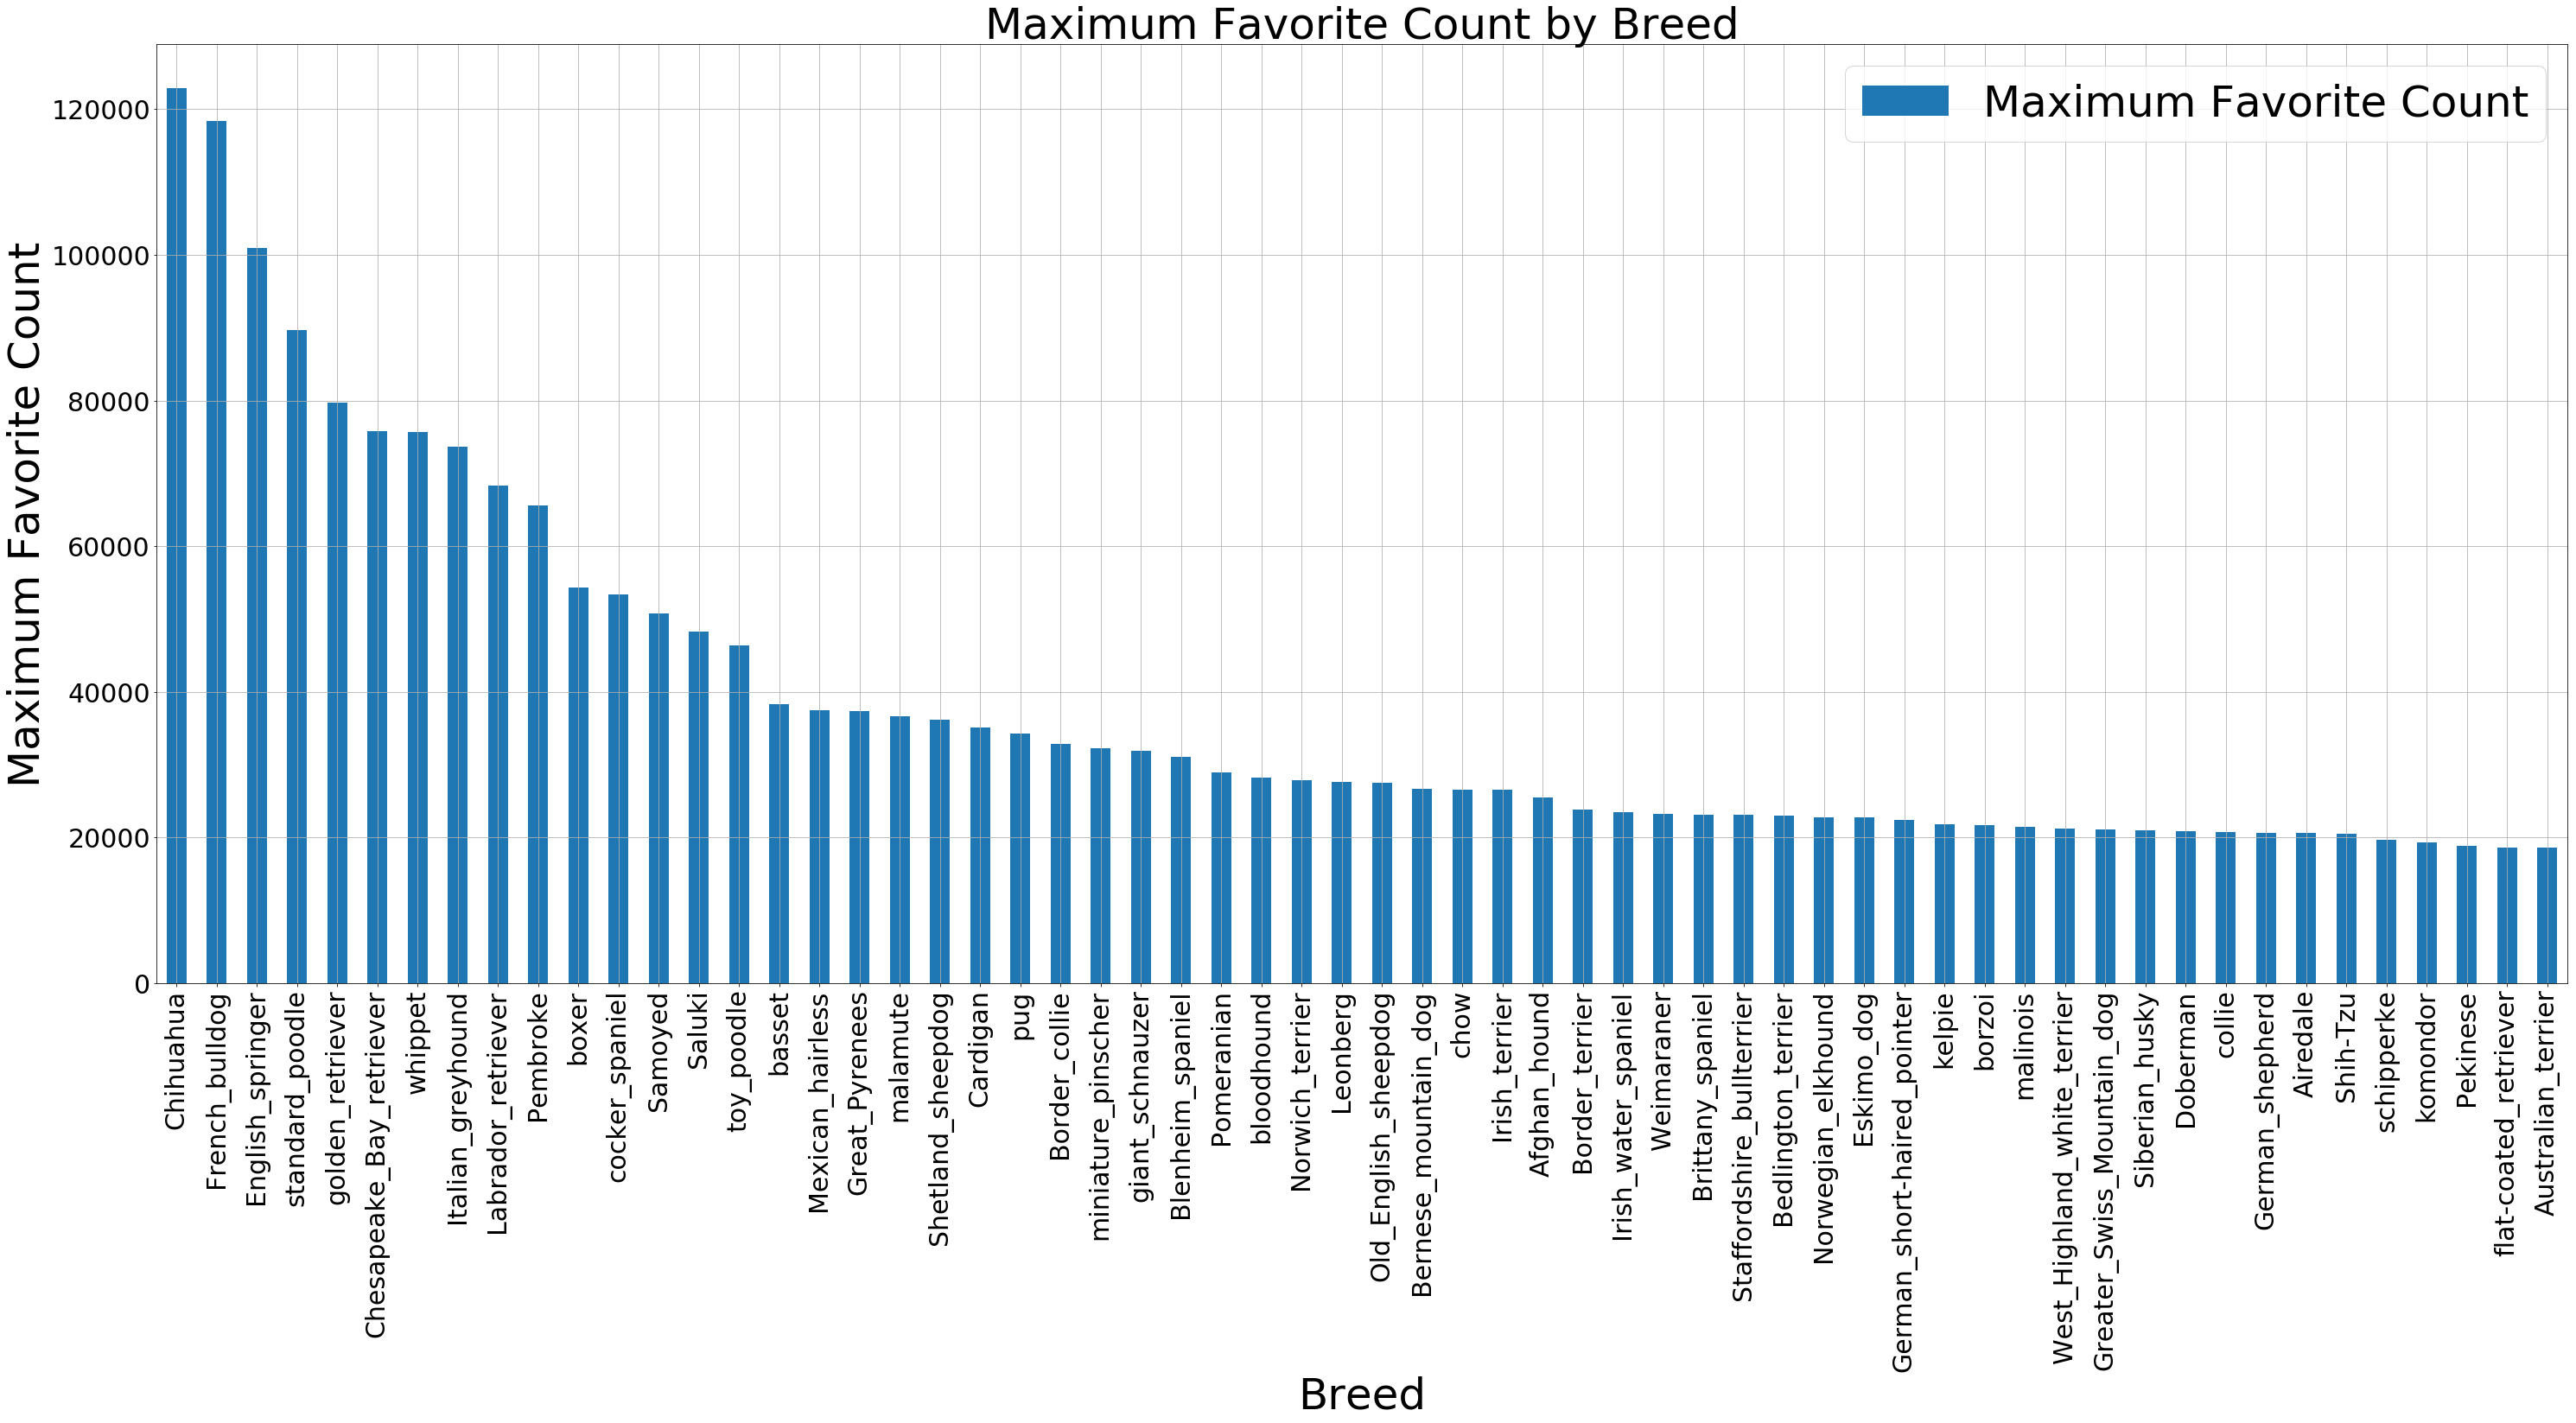

In [122]:
get_pareto(
    data_column = 'fav_count',
    grp_by = 'breed',
    agg_function = 'max',
    agg_label = 'Maximum Favorite Count',
    chart_title = 'Maximum Favorite Count by Breed',
    chart_xlabel = 'Breed',
    chart_ylabel = 'Maximum Favorite Count',
    chart_legend = 'Maximum Favorite Count',
    chart_filename = 'maximum_fav_by_breed'
)

In [123]:
display(new_tweet_clean[['tweet_id','url']][new_tweet_clean['favorite_count'] == 122846])
display(new_tweet_clean[['tweet_id','url']][new_tweet_clean['favorite_count'] == 118335])
display(new_tweet_clean[['tweet_id','url']][new_tweet_clean['favorite_count'] == 100902])

display(new_dog_clean['jpg_url'][new_dog_clean['tweet_id'] == '807106840509214720'])
display(new_dog_clean['jpg_url'][new_dog_clean['tweet_id'] == '866450705531457537'])
display(new_dog_clean['jpg_url'][new_dog_clean['tweet_id'] == '879415818425184262'])


,tweet_id,url
534,807106840509214720,https://twitter.com/dog_rates/status/807106840509214720/video/1


,tweet_id,url
135,866450705531457537,https://twitter.com/dog_rates/status/866450705531457537/photo/1


,tweet_id,url
66,879415818425184262,https://twitter.com/dog_rates/status/879415818425184262/video/1


534    https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
Name: jpg_url, dtype: object

135    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
Name: jpg_url, dtype: object

66    https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg
Name: jpg_url, dtype: object